## Customer Churn Classification

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
#Loading the Dataset

df = pd.read_csv("churn_1.csv")
df.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [7]:
df.shape

(3326, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3326 non-null   int64  
 1   voice_mail_plan         3326 non-null   int64  
 2   voice_mail_messages     3326 non-null   int64  
 3   day_mins                3326 non-null   float64
 4   evening_mins            3326 non-null   float64
 5   night_mins              3326 non-null   float64
 6   international_mins      3326 non-null   float64
 7   customer_service_calls  3326 non-null   int64  
 8   international_plan      3326 non-null   int64  
 9   day_calls               3326 non-null   int64  
 10  day_charge              3326 non-null   float64
 11  evening_calls           3326 non-null   int64  
 12  evening_charge          3326 non-null   float64
 13  night_calls             3326 non-null   int64  
 14  night_charge            3326 non-null   

In [9]:
df.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.00000,3326.000000,3326.00000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000
mean,100.798256,0.276909,8.108839,179.830968,200.970716,200.860102,10.244167,1.56374,0.096813,100.41822,30.571801,100.141311,17.082724,100.107336,9.038788,4.481359,2.766434,59.459747,0.144618
std,39.435985,0.447539,13.695668,54.490835,50.732635,50.592503,2.787689,1.31595,0.295747,20.06665,9.263423,19.911168,4.312267,19.581829,2.276711,2.462369,0.752654,10.505315,0.351768
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.00000,0.000000,87.00000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.390000,0.000000
50%,100.000000,0.000000,0.000000,179.400000,201.400000,201.100000,10.300000,1.00000,0.000000,101.00000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.600000,235.300000,235.375000,12.100000,2.00000,0.000000,114.00000,36.820000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.490000,0.000000
max,217.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.00000,1.000000,165.00000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


In [10]:
df.drop_duplicates()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3322,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3323,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3324,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


In [11]:
df.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

In [12]:
df.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

<AxesSubplot:>

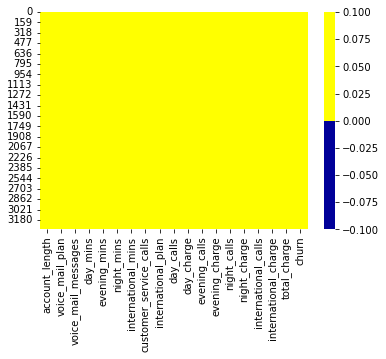

In [13]:
import seaborn as sns
cols = df.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(),
            cmap=sns.color_palette(colours))

In [14]:
# sns.pairplot(df)

In [15]:
# Plot Distribution plot checking the data is normal or not
# plt.figure(figsize=(16,5))
# for column in df:
#     plt.figure()
#     sns.distplot(df[column])

Text(0.5, 1.0, 'Visualization of outliers')

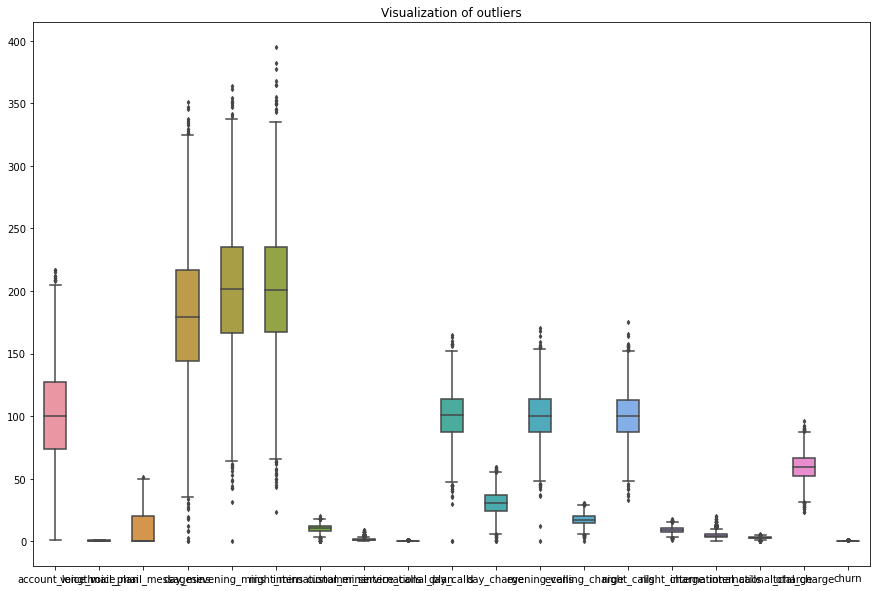

In [16]:
# Checking the existence of outliers using boxplots
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = df, width = 0.5, ax = ax, fliersize = 3)
plt.title("Visualization of outliers") 

In [17]:
# import matplotlib.pyplot as plt

# for column in df:
#     plt.figure()
#     df.boxplot([column])

c:\Users\Shree\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<Figure size 1152x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

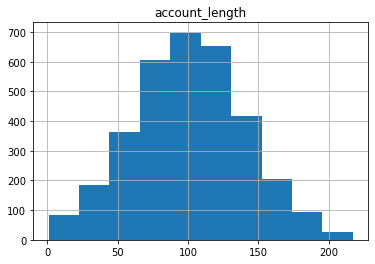

<Figure size 432x288 with 0 Axes>

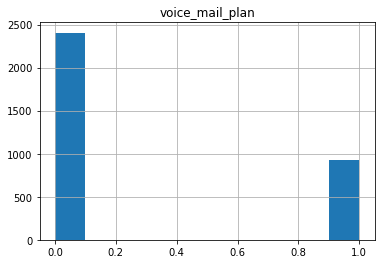

<Figure size 432x288 with 0 Axes>

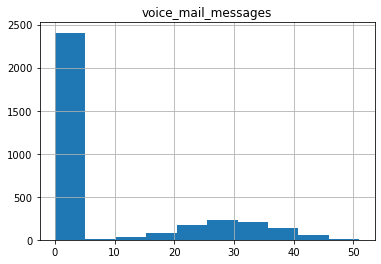

<Figure size 432x288 with 0 Axes>

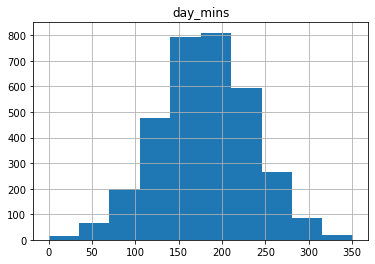

<Figure size 432x288 with 0 Axes>

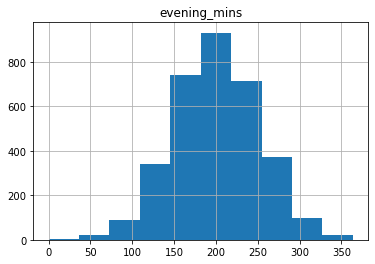

<Figure size 432x288 with 0 Axes>

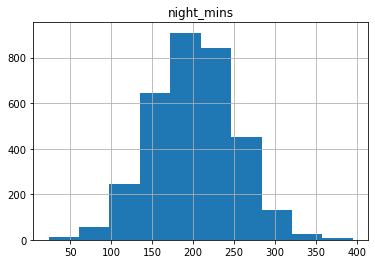

<Figure size 432x288 with 0 Axes>

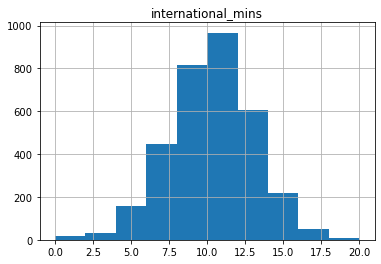

<Figure size 432x288 with 0 Axes>

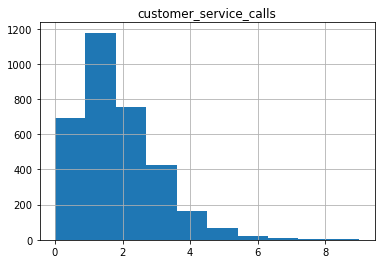

<Figure size 432x288 with 0 Axes>

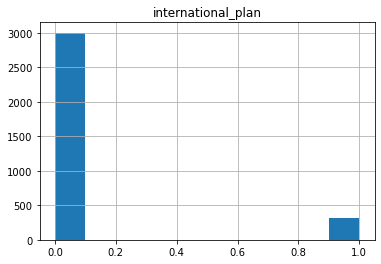

<Figure size 432x288 with 0 Axes>

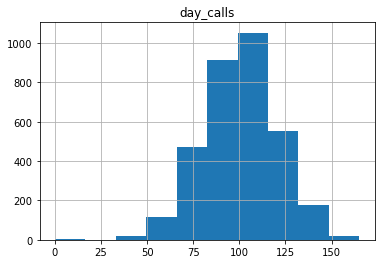

<Figure size 432x288 with 0 Axes>

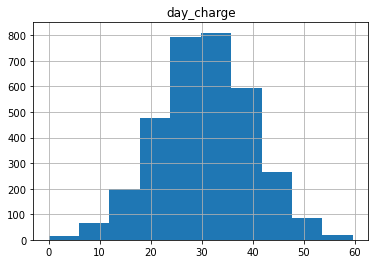

<Figure size 432x288 with 0 Axes>

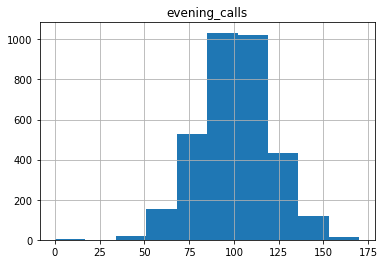

<Figure size 432x288 with 0 Axes>

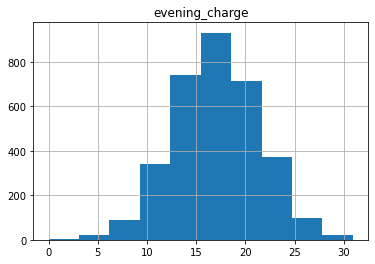

<Figure size 432x288 with 0 Axes>

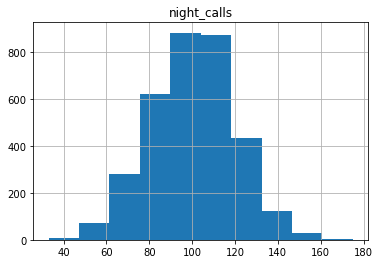

<Figure size 432x288 with 0 Axes>

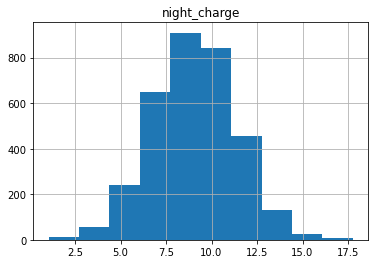

<Figure size 432x288 with 0 Axes>

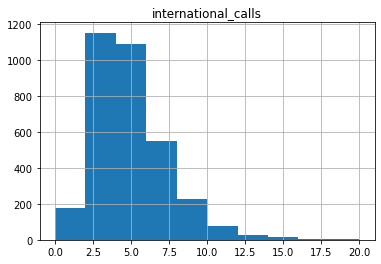

<Figure size 432x288 with 0 Axes>

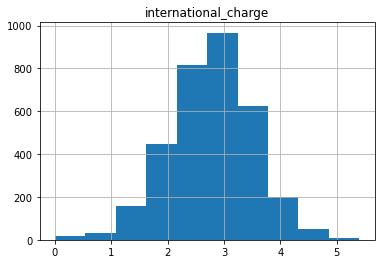

<Figure size 432x288 with 0 Axes>

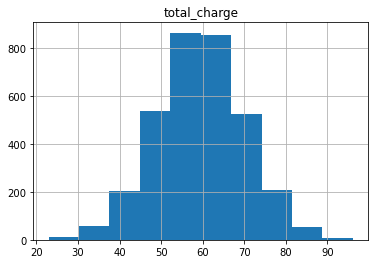

<Figure size 432x288 with 0 Axes>

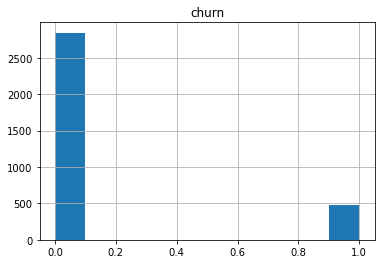

In [18]:
# Histogram
plt.figure(figsize=(16,5))
for column in df:
    plt.figure()
    df.hist([column])

<AxesSubplot:xlabel='churn', ylabel='count'>

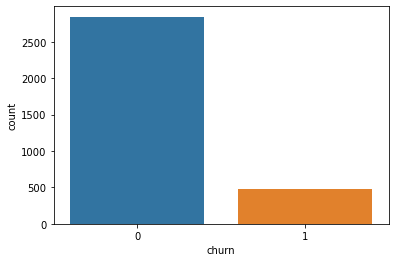

In [19]:
# Exploratory Data Analysis.
sns.countplot(x = 'churn', data = df)    

<AxesSubplot:xlabel='voice_mail_plan', ylabel='count'>

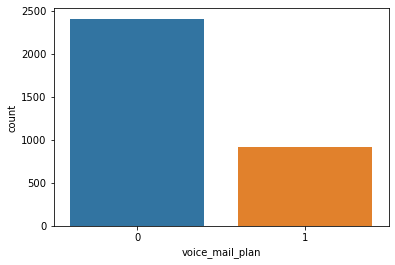

In [20]:
sns.countplot(x = 'voice_mail_plan', data = df)

<AxesSubplot:xlabel='international_plan', ylabel='count'>

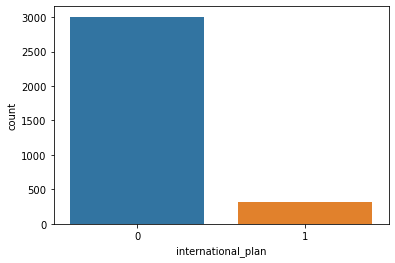

In [21]:
sns.countplot(x = 'international_plan', data = df)

In [22]:
mean = np.mean(df)
std = np.std(df)
print('mean of the dataset is', mean)
print('std. deviation is', std)


mean of the dataset is account_length            100.798256
voice_mail_plan             0.276909
voice_mail_messages         8.108839
day_mins                  179.830968
evening_mins              200.970716
night_mins                200.860102
international_mins         10.244167
customer_service_calls      1.563740
international_plan          0.096813
day_calls                 100.418220
day_charge                 30.571801
evening_calls             100.141311
evening_charge             17.082724
night_calls               100.107336
night_charge                9.038788
international_calls         4.481359
international_charge        2.766434
total_charge               59.459747
churn                       0.144618
dtype: float64
std. deviation is account_length            39.430056
voice_mail_plan            0.447471
voice_mail_messages       13.693608
day_mins                  54.482642
evening_mins              50.725008
night_mins                50.584897
international_mins       

# 1. Account Length Using Z-Score

c:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


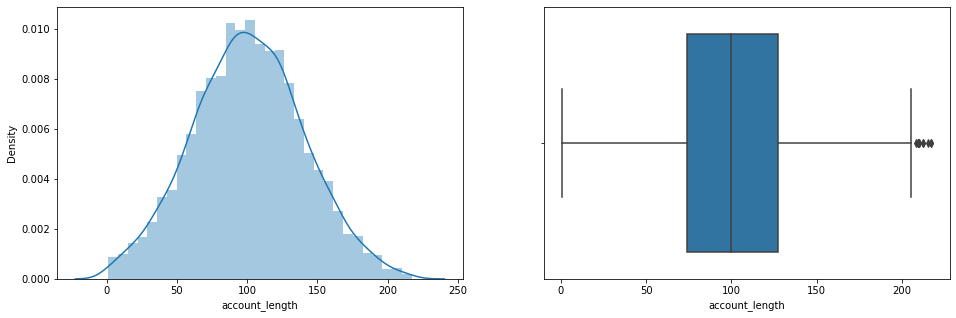

In [23]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["account_length"])

plt.subplot(1,2,2)
sns.boxplot(df["account_length"])

plt.show()

In [24]:
# Remove Outliers using z-score
print("Mean value of Account length",df["account_length"].mean())
print("std value of Account length",df["account_length"].std())
print("Max value of Account length",df["account_length"].max())
print("Min value of Account length",df["account_length"].min())

Mean value of Account length 100.79825616355983
std value of Account length 39.43598459742882
Max value of Account length 217
Min value of Account length 1


In [25]:
# Finding the boundry values
Highest_Value=print("Highest Value",df["account_length"].mean() + 3*df["account_length"].std())
Lowest_Value=print("Lowest Value",df["account_length"].mean() - 3*df["account_length"].std())

Highest Value 219.10620995584628
Lowest Value -17.50969762872664


In [26]:
# Finding the outliers
df[(df["account_length"] > Highest_Value)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn


In [27]:
df[(df["account_length"] < Lowest_Value)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn


In [28]:
# Trimming
new_df=df[(df["account_length"] < Highest_Value) & (df["account_length"] > Lowest_Value)]
new_df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn


In [29]:
# Approach 2
# Calculating the Z-Score
df["account_length z-score"]=(df["account_length"]-df["account_length"].mean())/df["account_length"].std()

In [30]:
df.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0,0.689770
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0,0.157261
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0,0.917988
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0,-0.425963
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0,-0.654181


In [31]:
# Checking those outliers that are greater than 3
df[df["account_length z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score


In [32]:
# Checking those outliers that are less than -3
df[df["account_length z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score


In [33]:
outlier_Al=df[(df["account_length z-score"] > 3) | (df["account_length z-score"] < -3)]
print(outlier_Al.shape)
outlier_Al

(0, 20)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score


In [34]:
df.drop([416,817,1408,1551,1751,1886,3216], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0,0.689770
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0,0.157261
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0,0.917988
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0,-0.425963
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0,-0.654181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0,2.312653
3322,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0,-0.831683
3323,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0,-1.845986
3324,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0,2.109792


# 2.voice_mail_messages Using IQR

c:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


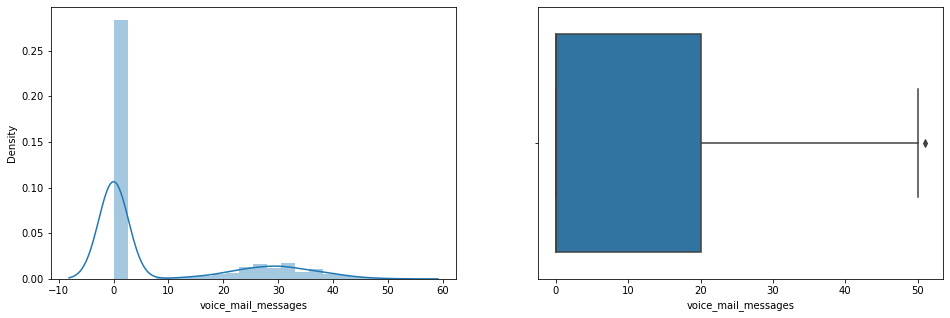

In [35]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["voice_mail_messages"])

plt.subplot(1,2,2)
sns.boxplot(df["voice_mail_messages"])

plt.show()

In [36]:
df["voice_mail_messages"].skew()

1.2631901572665727

In [37]:
# Finding IQR
Percentile25=df["voice_mail_messages"].quantile(0.25)
print("Percentile 25 :",Percentile25)
Percentile75=df["voice_mail_messages"].quantile(0.75)
print("Percentile 75 :",Percentile75)

Percentile 25 : 0.0
Percentile 75 : 20.0


In [38]:
iqr=Percentile75-Percentile25
print("IQR :",iqr)

IQR : 20.0


In [39]:
upper_limit=Percentile75+1.5*iqr
print("Upper Limit",upper_limit)
lower_limit=Percentile25-1.5*iqr
print("Lower Limit",lower_limit)

Upper Limit 50.0
Lower Limit -30.0


In [40]:
Ul=df[df["voice_mail_messages"]>upper_limit]
print(Ul.shape)
Ul

(1, 20)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score
843,144,1,51,283.9,192.0,196.3,10.0,1,0,98,48.26,109,16.32,85,8.83,4,2.7,76.11,0,1.09549


In [41]:
Ll=df[df["voice_mail_messages"]<lower_limit]
print(Ll.shape)
Ll

(0, 20)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score


In [42]:
outlier_Vmm=df[(df["voice_mail_messages"]>upper_limit ) | (df["voice_mail_messages"]<lower_limit)]
print(outlier_Vmm.shape)
outlier_Vmm

(1, 20)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score
843,144,1,51,283.9,192.0,196.3,10.0,1,0,98,48.26,109,16.32,85,8.83,4,2.7,76.11,0,1.09549


In [43]:
df.drop([845], axis=0, inplace=True)

# 3.Day Mins

c:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


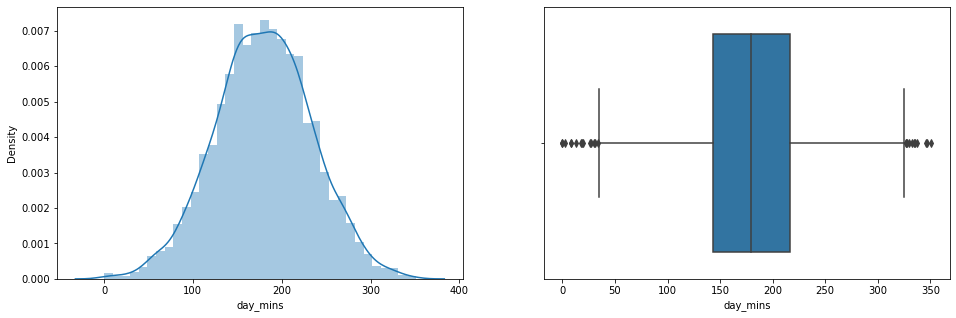

In [44]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["day_mins"])

plt.subplot(1,2,2)
sns.boxplot(df["day_mins"])

plt.show()

In [45]:
# Remove Outliers using z-score
print("Mean value of Day Mins",df["day_mins"].mean())
print("std value of Day Mins",df["day_mins"].std())
print("Max value of Day Mins",df["day_mins"].max())
print("Min value of Day Mins",df["day_mins"].min())

Mean value of Day Mins 179.83607594936723
std value of Day Mins 54.524517312440416
Max value of Day Mins 350.8
Min value of Day Mins 0.0


In [46]:
# Calculating the Z-Score
df["day_mins z-score"]=(df["day_mins"]-df["day_mins"].mean())/df["day_mins"].std()

In [47]:
# Checking those outliers that are greater than 3
df[df["day_mins z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score
365,154,0,0,350.8,216.5,253.9,10.1,1,0,75,...,94,18.40,100,11.43,9,2.73,92.20,1,1.349066,3.135542
983,64,0,0,346.8,249.5,275.4,13.3,1,1,55,...,79,21.21,102,12.39,9,3.59,96.15,1,-0.933114,3.062181
2588,115,0,0,345.3,203.4,217.5,11.8,1,1,81,...,106,17.29,107,9.79,8,3.19,88.97,1,0.360121,3.034670


In [48]:
# Checking those outliers that are less than -3
df[df["day_mins z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score
1050,98,0,0,12.5,256.6,169.4,7.7,1,1,67,...,90,21.81,88,7.62,9,2.08,33.64,0,-0.070957,-3.069006
1343,98,0,0,0.0,159.6,167.1,6.8,4,0,0,...,130,13.57,88,7.52,1,1.84,22.93,1,-0.070957,-3.298261
1395,101,0,0,0.0,192.1,168.8,7.2,1,0,0,...,119,16.33,95,7.60,4,1.94,25.87,0,0.005116,-3.298261
1980,70,0,0,7.9,136.4,156.6,12.1,0,0,100,...,83,11.59,89,7.05,1,3.27,23.25,0,-0.780968,-3.153372
2730,127,1,27,2.6,254.0,242.7,9.2,3,0,113,...,102,21.59,156,10.92,5,2.48,35.43,0,0.664412,-3.250576
2747,134,0,0,7.8,171.4,186.5,12.9,2,0,86,...,100,14.57,80,8.39,2,3.48,27.77,0,0.841915,-3.155206


In [49]:
outlier_Dm=df[(df["day_mins z-score"] > 3) | (df["day_mins z-score"] < -3)]
print(outlier_Dm.shape)
outlier_Dm

(9, 21)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score
365,154,0,0,350.8,216.5,253.9,10.1,1,0,75,...,94,18.40,100,11.43,9,2.73,92.20,1,1.349066,3.135542
983,64,0,0,346.8,249.5,275.4,13.3,1,1,55,...,79,21.21,102,12.39,9,3.59,96.15,1,-0.933114,3.062181
1050,98,0,0,12.5,256.6,169.4,7.7,1,1,67,...,90,21.81,88,7.62,9,2.08,33.64,0,-0.070957,-3.069006
1343,98,0,0,0.0,159.6,167.1,6.8,4,0,0,...,130,13.57,88,7.52,1,1.84,22.93,1,-0.070957,-3.298261
1395,101,0,0,0.0,192.1,168.8,7.2,1,0,0,...,119,16.33,95,7.60,4,1.94,25.87,0,0.005116,-3.298261
1980,70,0,0,7.9,136.4,156.6,12.1,0,0,100,...,83,11.59,89,7.05,1,3.27,23.25,0,-0.780968,-3.153372
2588,115,0,0,345.3,203.4,217.5,11.8,1,1,81,...,106,17.29,107,9.79,8,3.19,88.97,1,0.360121,3.034670
2730,127,1,27,2.6,254.0,242.7,9.2,3,0,113,...,102,21.59,156,10.92,5,2.48,35.43,0,0.664412,-3.250576
2747,134,0,0,7.8,171.4,186.5,12.9,2,0,86,...,100,14.57,80,8.39,2,3.48,27.77,0,0.841915,-3.155206


In [50]:
df.drop([365,985,1052,1345,1397,1986,2594,2736,2753], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,99,16.78,91,11.01,3,2.70,75.56,0,0.689770,1.563772
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,103,16.62,103,11.45,3,3.70,59.24,0,0.157261,-0.334456
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,110,10.30,104,7.32,5,3.29,62.29,0,0.917988,1.165786
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,88,5.26,89,8.86,7,1.78,66.80,0,-0.425963,2.192847
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,122,12.61,121,8.41,3,2.73,52.09,0,-0.654181,-0.240921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,126,18.32,83,12.56,6,2.67,60.10,0,2.312653,-0.433494
3322,68,0,0,231.1,153.4,191.3,9.6,3,0,57,...,55,13.04,123,8.61,4,2.59,63.53,0,-0.831683,0.940200
3323,28,0,0,180.8,288.8,191.9,14.1,2,0,109,...,58,24.55,91,8.64,6,3.81,67.74,0,-1.845986,0.017679
3324,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,84,13.57,137,6.26,10,1.35,57.53,0,2.109792,0.622911


# 4.evening_mins

c:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


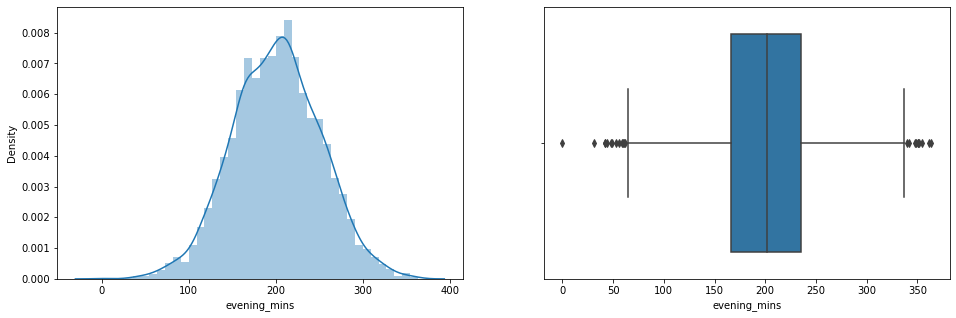

In [51]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["evening_mins"])

plt.subplot(1,2,2)
sns.boxplot(df["evening_mins"])

plt.show()

In [52]:
# Remove Outliers using z-score
print("Mean value of evening_mins",df["evening_mins"].mean())
print("std value of evening_mins",df["evening_mins"].std())
print("Max value of evening_mins",df["evening_mins"].max())
print("Min value of evening_mins",df["evening_mins"].min())

Mean value of evening_mins 201.07189483227558
std value of evening_mins 50.74135634487988
Max value of evening_mins 363.7
Min value of evening_mins 0.0


In [53]:
# Calculating the Z-Score
df["evening_mins z-score"]=(df["evening_mins"]-df["evening_mins"].mean())/df["evening_mins"].std()

In [54]:
# Checking those outliers that are greater than 3
df[df["evening_mins z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score
2325,46,1,34,191.4,361.8,147.5,7.2,1,0,102,...,30.75,132,6.64,2,1.94,71.87,0,-1.389550,0.212087,3.167596
2545,102,0,0,129.5,354.2,145.5,10.9,1,0,56,...,30.11,93,6.55,3,2.94,61.62,0,0.030473,-0.923182,3.017817
2726,130,0,0,216.2,363.7,126.7,16.9,5,1,106,...,30.91,123,5.70,2,4.56,77.92,1,0.740485,0.666928,3.205041


In [55]:
# Checking those outliers that are less than -3
df[df["evening_mins z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score
32,172,0,0,212.0,31.2,293.3,12.6,3,0,121,...,2.65,78,13.20,10,3.40,55.29,0,1.805502,0.589898,-3.347800
532,125,1,36,201.3,42.2,125.7,5.4,1,0,117,...,3.59,104,5.66,3,1.46,44.93,0,0.613697,0.393656,-3.131014
819,80,0,0,105.8,43.9,189.6,13.1,0,0,110,...,3.73,87,8.53,5,3.54,33.79,0,-0.527393,-1.357849,-3.097511
887,103,0,0,198.5,42.5,179.2,12.4,0,0,112,...,3.61,124,8.06,5,3.35,48.77,0,0.055831,0.342303,-3.125102
1231,48,0,0,128.2,48.1,116.3,8.9,0,0,71,...,4.09,80,5.23,3,2.40,33.51,0,-1.338834,-0.947025,-3.014738
2926,97,0,0,209.2,0.0,175.4,11.8,1,0,134,...,0.00,94,7.89,6,3.19,46.64,0,-0.096314,0.538545,-3.962683


In [56]:
outlier_Em=df[(df["evening_mins z-score"] > 3) | (df["evening_mins z-score"] < -3)]
print(outlier_Em.shape)
outlier_Em

(9, 22)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score
32,172,0,0,212.0,31.2,293.3,12.6,3,0,121,...,2.65,78,13.20,10,3.40,55.29,0,1.805502,0.589898,-3.347800
532,125,1,36,201.3,42.2,125.7,5.4,1,0,117,...,3.59,104,5.66,3,1.46,44.93,0,0.613697,0.393656,-3.131014
819,80,0,0,105.8,43.9,189.6,13.1,0,0,110,...,3.73,87,8.53,5,3.54,33.79,0,-0.527393,-1.357849,-3.097511
887,103,0,0,198.5,42.5,179.2,12.4,0,0,112,...,3.61,124,8.06,5,3.35,48.77,0,0.055831,0.342303,-3.125102
1231,48,0,0,128.2,48.1,116.3,8.9,0,0,71,...,4.09,80,5.23,3,2.40,33.51,0,-1.338834,-0.947025,-3.014738
2325,46,1,34,191.4,361.8,147.5,7.2,1,0,102,...,30.75,132,6.64,2,1.94,71.87,0,-1.389550,0.212087,3.167596
2545,102,0,0,129.5,354.2,145.5,10.9,1,0,56,...,30.11,93,6.55,3,2.94,61.62,0,0.030473,-0.923182,3.017817
2726,130,0,0,216.2,363.7,126.7,16.9,5,1,106,...,30.91,123,5.70,2,4.56,77.92,1,0.740485,0.666928,3.205041
2926,97,0,0,209.2,0.0,175.4,11.8,1,0,134,...,0.00,94,7.89,6,3.19,46.64,0,-0.096314,0.538545,-3.962683


In [57]:
df.drop([32,533,821,889,1233,2331,2551,2732,2932], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,16.78,91,11.01,3,2.70,75.56,0,0.689770,1.563772,-0.072365
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,16.62,103,11.45,3,3.70,59.24,0,0.157261,-0.334456,-0.109810
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,10.30,104,7.32,5,3.29,62.29,0,0.917988,1.165786,-1.574099
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,5.26,89,8.86,7,1.78,66.80,0,-0.425963,2.192847,-2.742770
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,12.61,121,8.41,3,2.73,52.09,0,-0.654181,-0.240921,-1.040017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,18.32,83,12.56,6,2.67,60.10,0,2.312653,-0.433494,0.284346
3322,68,0,0,231.1,153.4,191.3,9.6,3,0,57,...,13.04,123,8.61,4,2.59,63.53,0,-0.831683,0.940200,-0.939508
3323,28,0,0,180.8,288.8,191.9,14.1,2,0,109,...,24.55,91,8.64,6,3.81,67.74,0,-1.845986,0.017679,1.728927
3324,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,13.57,137,6.26,10,1.35,57.53,0,2.109792,0.622911,-0.817319


# 5.night_mins

c:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


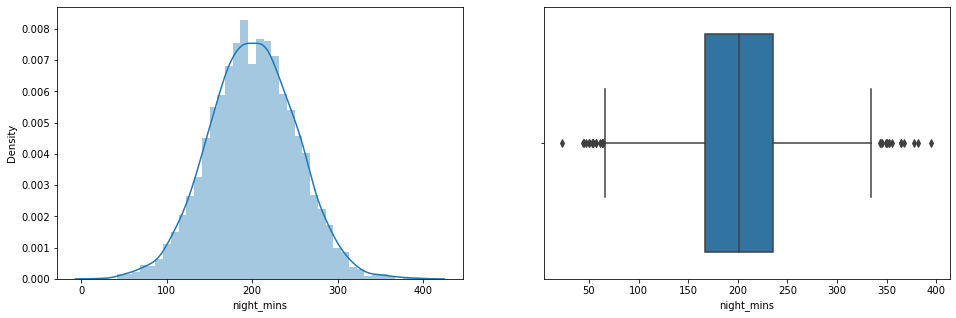

In [58]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["night_mins"])

plt.subplot(1,2,2)
sns.boxplot(df["night_mins"])

plt.show()

In [59]:
# Remove Outliers using z-score
print("Mean value of night_mins",df["night_mins"].mean())
print("std value of night_mins",df["night_mins"].std())
print("Max value of night_mins",df["night_mins"].max())
print("Min value of night_mins",df["night_mins"].min())

Mean value of night_mins 200.8515757575758
std value of night_mins 50.56723860793931
Max value of night_mins 395.0
Min value of night_mins 23.2


In [60]:
# Calculating the Z-Score
df["night_mins z-score"]=(df["night_mins"]-df["night_mins"].mean())/df["night_mins"].std()

In [61]:
# Checking those outliers that are greater than 3
df[df["night_mins z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score
244,108,0,0,198.5,267.8,354.9,9.4,0,0,99,...,75,15.97,3,2.54,75.02,1,0.182619,0.342303,1.315063,3.046408
920,80,0,0,239.9,142.3,364.3,9.3,1,0,121,...,106,16.39,5,2.51,71.78,0,-0.527393,1.101595,-1.158264,3.232299
1315,89,1,29,163.5,274.8,381.9,7.5,2,0,80,...,147,17.19,5,2.03,70.38,0,-0.299175,-0.299610,1.453018,3.580350
1442,55,1,8,222.5,171.5,377.5,9.7,1,0,104,...,114,16.99,2,2.62,72.02,0,-1.161332,0.782472,-0.582797,3.493337
2315,153,0,0,154.6,263.0,367.7,15.5,1,0,56,...,89,16.55,2,4.19,69.38,0,1.323708,-0.462839,1.220466,3.299536
2657,172,0,0,169.8,183.1,395.0,12.7,2,0,123,...,72,17.77,7,3.43,65.63,0,1.805502,-0.184065,-0.354186,3.839411
3101,73,0,0,157.6,198.3,364.9,9.1,1,0,92,...,106,16.42,4,2.46,62.53,0,-0.704896,-0.407818,-0.054628,3.244164


In [62]:
# Checking those outliers that are less than -3
df[df["night_mins z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score
881,42,0,0,146.3,255.9,45.0,8.0,1,0,84,...,117,2.03,12,2.16,50.81,0,-1.490980,-0.615064,1.080541,-3.082066
1111,152,0,0,206.3,292.8,43.7,10.6,1,0,98,...,121,1.97,4,2.86,64.79,0,1.298351,0.485358,1.807758,-3.107775
1258,76,1,22,160.1,168.7,23.2,9.5,3,0,107,...,102,1.04,4,2.57,45.17,0,-0.628823,-0.361967,-0.637979,-3.513175
3240,146,0,0,138.4,158.9,47.4,3.9,4,0,104,...,73,2.13,9,1.05,40.22,1,1.146206,-0.759953,-0.831115,-3.034605


In [63]:
outlier_Nm=df[(df["night_mins z-score"] > 3) | (df["night_mins z-score"] < -3)]
print(outlier_Nm.shape)
outlier_Nm

(11, 23)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score
244,108,0,0,198.5,267.8,354.9,9.4,0,0,99,...,75,15.97,3,2.54,75.02,1,0.182619,0.342303,1.315063,3.046408
881,42,0,0,146.3,255.9,45.0,8.0,1,0,84,...,117,2.03,12,2.16,50.81,0,-1.490980,-0.615064,1.080541,-3.082066
920,80,0,0,239.9,142.3,364.3,9.3,1,0,121,...,106,16.39,5,2.51,71.78,0,-0.527393,1.101595,-1.158264,3.232299
1111,152,0,0,206.3,292.8,43.7,10.6,1,0,98,...,121,1.97,4,2.86,64.79,0,1.298351,0.485358,1.807758,-3.107775
1258,76,1,22,160.1,168.7,23.2,9.5,3,0,107,...,102,1.04,4,2.57,45.17,0,-0.628823,-0.361967,-0.637979,-3.513175
1315,89,1,29,163.5,274.8,381.9,7.5,2,0,80,...,147,17.19,5,2.03,70.38,0,-0.299175,-0.299610,1.453018,3.580350
1442,55,1,8,222.5,171.5,377.5,9.7,1,0,104,...,114,16.99,2,2.62,72.02,0,-1.161332,0.782472,-0.582797,3.493337
2315,153,0,0,154.6,263.0,367.7,15.5,1,0,56,...,89,16.55,2,4.19,69.38,0,1.323708,-0.462839,1.220466,3.299536
2657,172,0,0,169.8,183.1,395.0,12.7,2,0,123,...,72,17.77,7,3.43,65.63,0,1.805502,-0.184065,-0.354186,3.839411
3101,73,0,0,157.6,198.3,364.9,9.1,1,0,92,...,106,16.42,4,2.46,62.53,0,-0.704896,-0.407818,-0.054628,3.244164


In [64]:
df.drop([244,922,883,1113,1260,1317,1445,2321,2663,3107,3247], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,91,11.01,3,2.70,75.56,0,0.689770,1.563772,-0.072365,0.867131
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,103,11.45,3,3.70,59.24,0,0.157261,-0.334456,-0.109810,1.058955
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,104,7.32,5,3.29,62.29,0,0.917988,1.165786,-1.574099,-0.756450
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,89,8.86,7,1.78,66.80,0,-0.425963,2.192847,-2.742770,-0.078145
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,121,8.41,3,2.73,52.09,0,-0.654181,-0.240921,-1.040017,-0.275901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,83,12.56,6,2.67,60.10,0,2.312653,-0.433494,0.284346,1.547413
3322,68,0,0,231.1,153.4,191.3,9.6,3,0,57,...,123,8.61,4,2.59,63.53,0,-0.831683,0.940200,-0.939508,-0.188889
3323,28,0,0,180.8,288.8,191.9,14.1,2,0,109,...,91,8.64,6,3.81,67.74,0,-1.845986,0.017679,1.728927,-0.177023
3324,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,137,6.26,10,1.35,57.53,0,2.109792,0.622911,-0.817319,-1.219200


# 6.international_mins

c:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


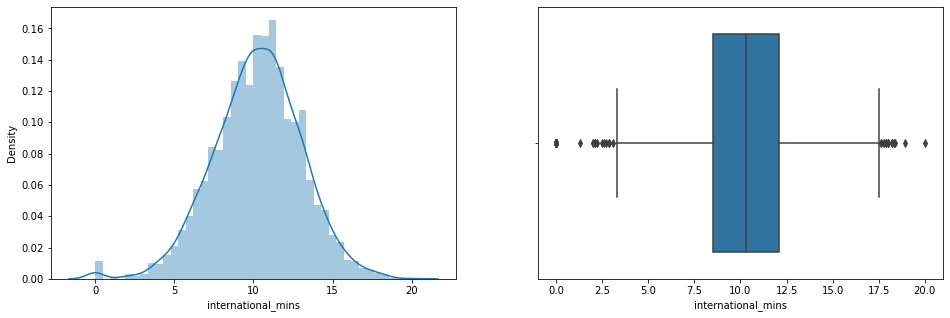

In [65]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["international_mins"])

plt.subplot(1,2,2)
sns.boxplot(df["international_mins"])

plt.show()

In [66]:
# Remove Outliers using z-score
print("Mean value of international_mins",df["international_mins"].mean())
print("std value of international_mins",df["international_mins"].std())
print("Max value of international_mins",df["international_mins"].max())
print("Min value of international_mins",df["international_mins"].min())

Mean value of international_mins 10.248525387655823
std value of international_mins 2.7843068733971097
Max value of international_mins 20.0
Min value of international_mins 0.0


In [67]:
# Calculating the Z-Score
df["international_mins z-score"]=(df["night_mins"]-df["international_mins"].mean())/df["international_mins"].std()

In [68]:
# Checking those outliers that are greater than 3
df[df["international_mins z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,11.01,3,2.70,75.56,0,0.689770,1.563772,-0.072365,0.867131,84.204610
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,11.45,3,3.70,59.24,0,0.157261,-0.334456,-0.109810,1.058955,87.688421
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,7.32,5,3.29,62.29,0,0.917988,1.165786,-1.574099,-0.756450,54.717918
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,8.86,7,1.78,66.80,0,-0.425963,2.192847,-2.742770,-0.078145,67.036962
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,8.41,3,2.73,52.09,0,-0.654181,-0.240921,-1.040017,-0.275901,63.445404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,12.56,6,2.67,60.10,0,2.312653,-0.433494,0.284346,1.547413,96.559570
3322,68,0,0,231.1,153.4,191.3,9.6,3,0,57,...,8.61,4,2.59,63.53,0,-0.831683,0.940200,-0.939508,-0.188889,65.025690
3323,28,0,0,180.8,288.8,191.9,14.1,2,0,109,...,8.64,6,3.81,67.74,0,-1.845986,0.017679,1.728927,-0.177023,65.241183
3324,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,6.26,10,1.35,57.53,0,2.109792,0.622911,-0.817319,-1.219200,46.313672


In [69]:
# Checking those outliers that are less than -3
df[df["international_mins z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score


In [70]:
outlier_Im=df[(df["international_mins z-score"] > 3) | (df["international_mins z-score"] < -3)]
print(outlier_Im.shape)
outlier_Im

(3289, 24)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,11.01,3,2.70,75.56,0,0.689770,1.563772,-0.072365,0.867131,84.204610
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,11.45,3,3.70,59.24,0,0.157261,-0.334456,-0.109810,1.058955,87.688421
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,7.32,5,3.29,62.29,0,0.917988,1.165786,-1.574099,-0.756450,54.717918
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,8.86,7,1.78,66.80,0,-0.425963,2.192847,-2.742770,-0.078145,67.036962
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,8.41,3,2.73,52.09,0,-0.654181,-0.240921,-1.040017,-0.275901,63.445404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,12.56,6,2.67,60.10,0,2.312653,-0.433494,0.284346,1.547413,96.559570
3322,68,0,0,231.1,153.4,191.3,9.6,3,0,57,...,8.61,4,2.59,63.53,0,-0.831683,0.940200,-0.939508,-0.188889,65.025690
3323,28,0,0,180.8,288.8,191.9,14.1,2,0,109,...,8.64,6,3.81,67.74,0,-1.845986,0.017679,1.728927,-0.177023,65.241183
3324,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,6.26,10,1.35,57.53,0,2.109792,0.622911,-0.817319,-1.219200,46.313672


In [72]:
#df.drop([3328,3329,3330,3332,3331], axis=0, inplace=True)

# 7.customer_service_calls

In [73]:
df["customer_service_calls"].skew()

1.0919413128032003

c:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


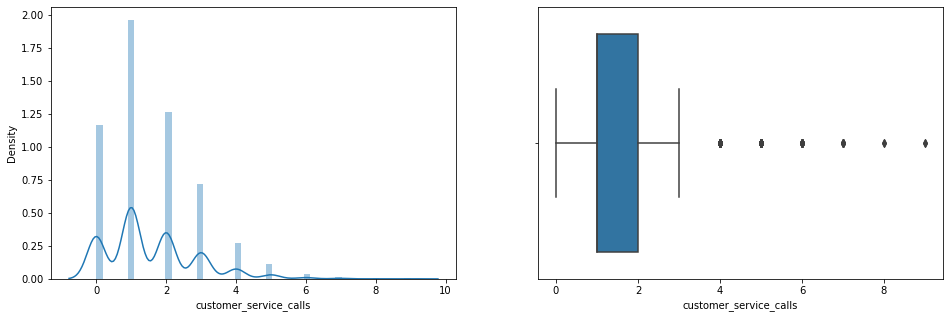

In [74]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["customer_service_calls"])

plt.subplot(1,2,2)
sns.boxplot(df["customer_service_calls"])

plt.show()

In [75]:
# Finding IQR
Percentile25=df["customer_service_calls"].quantile(0.25)
print("Percentile 25 :",Percentile25)
Percentile75=df["customer_service_calls"].quantile(0.75)
print("Percentile 75 :",Percentile75)

Percentile 25 : 1.0
Percentile 75 : 2.0


In [76]:
iqr=Percentile75-Percentile25
print("IQR :",iqr)

IQR : 1.0


In [77]:
upper_limit=Percentile75+1.5*iqr
print("Upper Limit",upper_limit)
lower_limit=Percentile25-1.5*iqr
print("Lower Limit",lower_limit)

Upper Limit 3.5
Lower Limit -0.5


In [78]:
Ul=df[df["customer_service_calls"]>upper_limit]
Ul.shape

(260, 24)

In [79]:
Ll=df[df["customer_service_calls"]<lower_limit]
Ll.shape

(0, 24)

In [80]:
outlier_Csc=df[(df["customer_service_calls"]>upper_limit ) | (df["customer_service_calls"]<lower_limit)]
print(outlier_Csc.shape)
outlier_Csc

(260, 24)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score
10,65,0,0,129.1,228.5,208.8,12.7,4,0,137,...,9.40,6,3.43,54.20,1,-0.907756,-0.930519,0.540547,0.157185,71.310916
14,62,0,0,120.7,307.2,203.0,13.1,4,0,70,...,9.14,6,3.54,59.31,0,-0.983829,-1.084578,2.091550,0.042486,69.227813
15,161,0,0,332.9,317.8,160.6,5.4,4,0,67,...,7.23,9,1.46,92.29,1,1.526569,2.807250,2.300453,-0.796001,53.999606
21,77,0,0,62.4,169.9,209.6,5.7,5,0,89,...,9.43,6,1.54,36.02,1,-0.603466,-2.153821,-0.614329,0.173006,71.598241
48,119,0,0,159.1,231.3,143.2,8.8,5,0,114,...,6.44,3,2.38,55.53,1,0.461552,-0.380307,0.595729,-1.140097,47.750295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,172,0,0,203.9,234.0,160.7,17.8,4,0,109,...,7.23,4,4.81,66.59,0,1.805502,0.441341,0.648940,-0.794023,54.035522
3302,100,0,0,219.4,225.7,255.3,12.0,4,1,112,...,11.49,4,3.24,71.21,0,-0.020242,0.725617,0.485366,1.076753,88.011662
3313,122,0,0,140.0,196.4,120.1,9.7,4,1,101,...,5.40,4,2.62,48.51,1,0.537624,-0.730609,-0.092073,-1.596915,39.453796
3315,62,0,0,321.1,265.5,180.5,11.5,4,0,105,...,8.12,2,3.11,88.39,1,-0.983829,2.590833,1.269736,-0.402466,61.146807


In [81]:
df.drop([3307,3309,3320,3322,3323], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,11.01,3,2.70,75.56,0,0.689770,1.563772,-0.072365,0.867131,84.204610
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,11.45,3,3.70,59.24,0,0.157261,-0.334456,-0.109810,1.058955,87.688421
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,7.32,5,3.29,62.29,0,0.917988,1.165786,-1.574099,-0.756450,54.717918
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,8.86,7,1.78,66.80,0,-0.425963,2.192847,-2.742770,-0.078145,67.036962
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,8.41,3,2.73,52.09,0,-0.654181,-0.240921,-1.040017,-0.275901,63.445404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,78,0,0,193.4,116.9,243.3,9.3,2,0,99,...,10.95,4,2.51,56.28,0,-0.578108,0.248767,-1.658842,0.839445,83.701792
3319,96,0,0,106.6,284.8,178.9,14.9,1,0,128,...,8.05,7,4.02,54.40,0,-0.121672,-1.343177,1.650096,-0.434107,60.572158
3321,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,12.56,6,2.67,60.10,0,2.312653,-0.433494,0.284346,1.547413,96.559570
3324,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,6.26,10,1.35,57.53,0,2.109792,0.622911,-0.817319,-1.219200,46.313672


# 8.international_plan

c:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


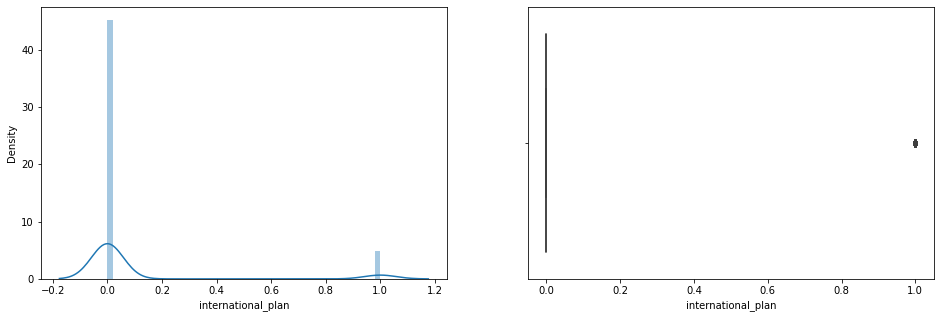

In [82]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["international_plan"])

plt.subplot(1,2,2)
sns.boxplot(df["international_plan"])

plt.show()

In [83]:
# Finding IQR
Percentile25=df["international_plan"].quantile(0.25)
print("Percentile 25 :",Percentile25)
Percentile75=df["international_plan"].quantile(0.75)
print("Percentile 75 :",Percentile75)

Percentile 25 : 0.0
Percentile 75 : 0.0


In [84]:
iqr=Percentile75-Percentile25
print("IQR :",iqr)

IQR : 0.0


In [85]:
upper_limit=Percentile75+1.5*iqr
print("Upper Limit",upper_limit)
lower_limit=Percentile25-1.5*iqr
print("Lower Limit",lower_limit)

Upper Limit 0.0
Lower Limit 0.0


In [86]:
Ul=df[df["international_plan"]>upper_limit]
Ul.shape

(319, 24)

In [87]:
Ll=df[df["international_plan"]<lower_limit]
Ll.shape

(0, 24)

In [88]:
outlier_Csc=df[(df["international_plan"]>upper_limit ) | (df["international_plan"]<lower_limit)]
print(outlier_Csc.shape)
outlier_Csc

(319, 24)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,8.86,7,1.78,66.80,0,-0.425963,2.192847,-2.742770,-0.078145,67.036962
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,8.41,3,2.73,52.09,0,-0.654181,-0.240921,-1.040017,-0.275901,63.445404
5,118,0,0,223.4,220.6,203.9,6.3,0,1,98,...,9.18,6,1.70,67.61,0,0.436194,0.798979,0.384856,0.060285,69.551053
7,147,0,0,157.0,103.1,211.8,7.1,0,1,79,...,9.53,6,1.92,46.90,0,1.171563,-0.418822,-1.930810,0.216512,72.388384
9,141,1,37,258.6,222.0,326.4,11.2,0,1,84,...,14.69,5,3.02,80.54,0,1.019418,1.444560,0.412447,2.482802,113.547640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,71,0,0,186.1,198.6,206.5,13.8,4,1,114,...,9.29,5,3.73,61.54,1,-0.755611,0.114883,-0.048716,0.111701,70.484858
3302,100,0,0,219.4,225.7,255.3,12.0,4,1,112,...,11.49,4,3.24,71.21,0,-0.020242,0.725617,0.485366,1.076753,88.011662
3310,163,0,0,197.2,188.5,211.1,7.8,1,1,90,...,9.50,8,2.11,61.15,0,1.577284,0.318461,-0.247764,0.202669,72.136975
3313,122,0,0,140.0,196.4,120.1,9.7,4,1,101,...,5.40,4,2.62,48.51,1,0.537624,-0.730609,-0.092073,-1.596915,39.453796


# 9.day_calls

c:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


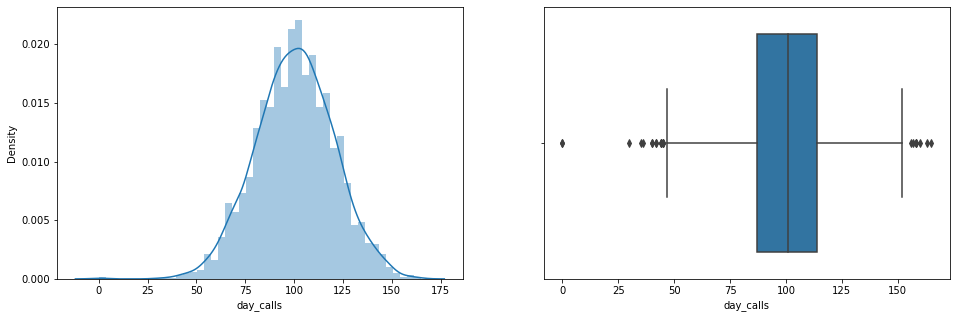

In [89]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["day_calls"])

plt.subplot(1,2,2)
sns.boxplot(df["day_calls"])

plt.show()

In [90]:
# Remove Outliers using z-score
print("Mean value of day_calls",df["day_calls"].mean())
print("std value of day_calls",df["day_calls"].std())
print("Max value of day_calls",df["day_calls"].max())
print("Min value of day_calls",df["day_calls"].min())

Mean value of day_calls 100.38550548112059
std value of day_calls 20.062239055009943
Max value of day_calls 165
Min value of day_calls 0


In [91]:
# Calculating the Z-Score
df["day_calls z-score"]=(df["day_calls"]-df["day_calls"].mean())/df["day_calls"].std()

In [92]:
# Checking those outliers that are greater than 3
df[df["day_calls z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score
467,86,1,32,70.9,166.7,244.9,11.1,3,0,163,...,5,3.00,40.24,0,-0.375248,-1.997928,-0.677394,0.871086,84.276441,3.121012
1119,91,0,0,154.4,168.3,239.9,11.7,5,0,165,...,4,3.16,54.52,1,-0.248460,-0.466507,-0.645862,0.772208,82.480662,3.220702


In [93]:
# Checking those outliers that are less than -3
df[df["day_calls z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score
691,82,0,0,185.8,276.5,192.1,5.7,4,0,36,...,7,1.54,65.27,0,-0.476678,0.109381,1.486521,-0.173068,65.313014,-3.209288
739,67,1,20,230.6,189.1,162.2,9.4,1,0,40,...,2,2.54,65.11,0,-0.857041,0.931029,-0.235940,-0.764360,54.574255,-3.009909
1142,155,0,0,216.7,144.3,135.3,10.8,2,0,30,...,1,2.92,58.12,0,1.374423,0.676098,-1.118849,-1.296325,44.912964,-3.508357
1343,98,0,0,0.0,159.6,167.1,6.8,4,0,0,...,1,1.84,22.93,1,-0.070957,-3.298261,-0.817319,-0.667459,56.334119,-5.003704
1395,101,0,0,0.0,192.1,168.8,7.2,1,0,0,...,4,1.94,25.87,0,0.005116,-3.298261,-0.176816,-0.633841,56.944684,-5.003704
1983,124,1,30,144.5,262.3,226.5,12.0,2,0,35,...,7,3.24,60.30,0,0.588339,-0.648077,1.206671,0.507214,77.667974,-3.259133
3181,58,1,39,211.9,274.4,210.5,5.4,1,0,40,...,4,1.46,70.27,0,-1.085259,0.588064,1.445135,0.190804,71.921481,-3.009909


In [94]:
outlier_Dca=df[(df["day_calls z-score"] > 3) | (df["day_calls z-score"] < -3)]
print(outlier_Dca.shape)
outlier_Dca

(9, 25)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score
467,86,1,32,70.9,166.7,244.9,11.1,3,0,163,...,5,3.00,40.24,0,-0.375248,-1.997928,-0.677394,0.871086,84.276441,3.121012
691,82,0,0,185.8,276.5,192.1,5.7,4,0,36,...,7,1.54,65.27,0,-0.476678,0.109381,1.486521,-0.173068,65.313014,-3.209288
739,67,1,20,230.6,189.1,162.2,9.4,1,0,40,...,2,2.54,65.11,0,-0.857041,0.931029,-0.235940,-0.764360,54.574255,-3.009909
1119,91,0,0,154.4,168.3,239.9,11.7,5,0,165,...,4,3.16,54.52,1,-0.248460,-0.466507,-0.645862,0.772208,82.480662,3.220702
1142,155,0,0,216.7,144.3,135.3,10.8,2,0,30,...,1,2.92,58.12,0,1.374423,0.676098,-1.118849,-1.296325,44.912964,-3.508357
1343,98,0,0,0.0,159.6,167.1,6.8,4,0,0,...,1,1.84,22.93,1,-0.070957,-3.298261,-0.817319,-0.667459,56.334119,-5.003704
1395,101,0,0,0.0,192.1,168.8,7.2,1,0,0,...,4,1.94,25.87,0,0.005116,-3.298261,-0.176816,-0.633841,56.944684,-5.003704
1983,124,1,30,144.5,262.3,226.5,12.0,2,0,35,...,7,3.24,60.30,0,0.588339,-0.648077,1.206671,0.507214,77.667974,-3.259133
3181,58,1,39,211.9,274.4,210.5,5.4,1,0,40,...,4,1.46,70.27,0,-1.085259,0.588064,1.445135,0.190804,71.921481,-3.009909


In [95]:
df.drop([468,692,740,1121,1144,1989,3187], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,3,2.70,75.56,0,0.689770,1.563772,-0.072365,0.867131,84.204610,0.479233
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,3,3.70,59.24,0,0.157261,-0.334456,-0.109810,1.058955,87.688421,1.127217
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,5,3.29,62.29,0,0.917988,1.165786,-1.574099,-0.756450,54.717918,0.678613
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,7,1.78,66.80,0,-0.425963,2.192847,-2.742770,-0.078145,67.036962,-1.464717
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,3,2.73,52.09,0,-0.654181,-0.240921,-1.040017,-0.275901,63.445404,0.628768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,78,0,0,193.4,116.9,243.3,9.3,2,0,99,...,4,2.51,56.28,0,-0.578108,0.248767,-1.658842,0.839445,83.701792,-0.069060
3319,96,0,0,106.6,284.8,178.9,14.9,1,0,128,...,7,4.02,54.40,0,-0.121672,-1.343177,1.650096,-0.434107,60.572158,1.376441
3321,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,6,2.67,60.10,0,2.312653,-0.433494,0.284346,1.547413,96.559570,-1.165648
3324,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,10,1.35,57.53,0,2.109792,0.622911,-0.817319,-1.219200,46.313672,0.230009


# 10.day_charge

c:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


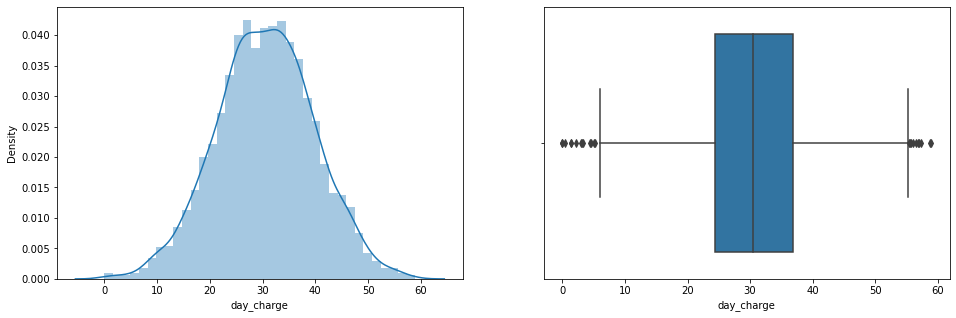

In [96]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["day_charge"])

plt.subplot(1,2,2)
sns.boxplot(df["day_charge"])

plt.show()

In [97]:
# Remove Outliers using z-score
print("Mean value of day_charge",df["day_charge"].mean())
print("std value of day_charge",df["day_charge"].std())
print("Max value of day_charge",df["day_charge"].max())
print("Min value of day_charge",df["day_charge"].min())

Mean value of day_charge 30.554531583765666
std value of day_charge 9.254919580888444
Max value of day_charge 58.96
Min value of day_charge 0.0


In [98]:
# Calculating the Z-Score
df["day_charge z-score"]=(df["day_charge"]-df["day_charge"].mean())/df["day_charge"].std()

In [99]:
# Checking those outliers that are greater than 3
df[df["day_charge z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score
983,64,0,0,346.8,249.5,275.4,13.3,1,1,55,...,3.59,96.15,1,-0.933114,3.062181,0.954411,1.474244,95.230694,-2.262235,3.069229
2588,115,0,0,345.3,203.4,217.5,11.8,1,1,81,...,3.19,88.97,1,0.360121,3.034670,0.045882,0.329233,74.435572,-0.966268,3.041136


In [100]:
# Checking those outliers that are greater than -3
df[df["day_charge z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score
1050,98,0,0,12.5,256.6,169.4,7.7,1,1,67,...,2.08,33.64,0,-0.070957,-3.069006,1.094336,-0.621975,57.160177,-1.664097,-3.071289
1343,98,0,0,0.0,159.6,167.1,6.8,4,0,0,...,1.84,22.93,1,-0.070957,-3.298261,-0.817319,-0.667459,56.334119,-5.003704,-3.301437
1395,101,0,0,0.0,192.1,168.8,7.2,1,0,0,...,1.94,25.87,0,0.005116,-3.298261,-0.176816,-0.633841,56.944684,-5.003704,-3.301437
1980,70,0,0,7.9,136.4,156.6,12.1,0,0,100,...,3.27,23.25,0,-0.780968,-3.153372,-1.274540,-0.875104,52.562983,-0.019215,-3.156649
2730,127,1,27,2.6,254.0,242.7,9.2,3,0,113,...,2.48,35.43,0,0.664412,-3.250576,1.043096,0.827580,83.486298,0.628768,-3.253894
2747,134,0,0,7.8,171.4,186.5,12.9,2,0,86,...,3.48,27.77,0,0.841915,-3.155206,-0.584767,-0.283812,63.301742,-0.717044,-3.157729


In [101]:
outlier_Dc=df[(df["day_charge z-score"] > 3) | (df["day_charge z-score"] < -3)]
print(outlier_Dc.shape)
outlier_Dc

(8, 26)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score
983,64,0,0,346.8,249.5,275.4,13.3,1,1,55,...,3.59,96.15,1,-0.933114,3.062181,0.954411,1.474244,95.230694,-2.262235,3.069229
1050,98,0,0,12.5,256.6,169.4,7.7,1,1,67,...,2.08,33.64,0,-0.070957,-3.069006,1.094336,-0.621975,57.160177,-1.664097,-3.071289
1343,98,0,0,0.0,159.6,167.1,6.8,4,0,0,...,1.84,22.93,1,-0.070957,-3.298261,-0.817319,-0.667459,56.334119,-5.003704,-3.301437
1395,101,0,0,0.0,192.1,168.8,7.2,1,0,0,...,1.94,25.87,0,0.005116,-3.298261,-0.176816,-0.633841,56.944684,-5.003704,-3.301437
1980,70,0,0,7.9,136.4,156.6,12.1,0,0,100,...,3.27,23.25,0,-0.780968,-3.153372,-1.274540,-0.875104,52.562983,-0.019215,-3.156649
2588,115,0,0,345.3,203.4,217.5,11.8,1,1,81,...,3.19,88.97,1,0.360121,3.034670,0.045882,0.329233,74.435572,-0.966268,3.041136
2730,127,1,27,2.6,254.0,242.7,9.2,3,0,113,...,2.48,35.43,0,0.664412,-3.250576,1.043096,0.827580,83.486298,0.628768,-3.253894
2747,134,0,0,7.8,171.4,186.5,12.9,2,0,86,...,3.48,27.77,0,0.841915,-3.155206,-0.584767,-0.283812,63.301742,-0.717044,-3.157729


In [102]:
df.drop([2252], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,2.70,75.56,0,0.689770,1.563772,-0.072365,0.867131,84.204610,0.479233,1.568406
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,3.70,59.24,0,0.157261,-0.334456,-0.109810,1.058955,87.688421,1.127217,-0.333286
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,3.29,62.29,0,0.917988,1.165786,-1.574099,-0.756450,54.717918,0.678613,1.169699
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,1.78,66.80,0,-0.425963,2.192847,-2.742770,-0.078145,67.036962,-1.464717,2.198341
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,2.73,52.09,0,-0.654181,-0.240921,-1.040017,-0.275901,63.445404,0.628768,-0.239282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,78,0,0,193.4,116.9,243.3,9.3,2,0,99,...,2.51,56.28,0,-0.578108,0.248767,-1.658842,0.839445,83.701792,-0.069060,0.251268
3319,96,0,0,106.6,284.8,178.9,14.9,1,0,128,...,4.02,54.40,0,-0.121672,-1.343177,1.650096,-0.434107,60.572158,1.376441,-1.343559
3321,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,2.67,60.10,0,2.312653,-0.433494,0.284346,1.547413,96.559570,-1.165648,-0.432692
3324,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,1.35,57.53,0,2.109792,0.622911,-0.817319,-1.219200,46.313672,0.230009,0.626204


# 11.evening_calls

c:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


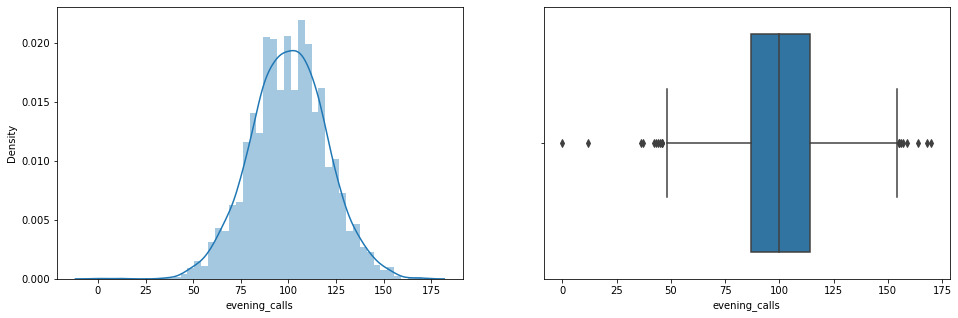

In [103]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["evening_calls"])

plt.subplot(1,2,2)
sns.boxplot(df["evening_calls"])

plt.show()

In [104]:
# Remove Outliers using z-score
print("Mean value of evening_calls",df["evening_calls"].mean())
print("std value of evening_calls",df["evening_calls"].std())
print("Max value of evening_calls",df["evening_calls"].max())
print("Min value of evening_calls",df["evening_calls"].min())

Mean value of evening_calls 100.16514041514041
std value of evening_calls 19.87909761138249
Max value of evening_calls 170
Min value of evening_calls 0


In [105]:
# Calculating the Z-Score
df["evening_calls z-score"]=(df["evening_calls"]-df["evening_calls"].mean())/df["evening_calls"].std()

In [106]:
# Checking those outliers that are greater than 3
df[df["evening_calls z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score
58,68,0,0,148.8,246.5,129.8,12.1,3,0,70,...,55.36,0,-0.831683,-0.569213,0.895288,-1.405091,42.937607,-1.514562,-0.567756,3.211155
301,127,0,0,266.6,264.8,207.2,5.9,1,0,106,...,78.74,1,0.664412,1.591283,1.255940,0.125544,70.736267,0.279854,1.595418,3.412371
3212,150,1,35,139.6,332.8,213.8,8.8,2,0,72,...,64.02,0,1.247636,-0.737945,2.596070,0.256064,73.106695,-1.414872,-0.737395,3.512979


In [107]:
# Checking those outliers that are less than -3
df[df["evening_calls z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score
645,153,1,28,235.6,227.9,170.3,15.4,0,0,74,...,71.24,0,1.323708,1.022731,0.528723,-0.604177,57.483418,-1.315182,1.025991,-3.177465
958,5,0,0,199.2,187.3,214.0,13.3,3,0,106,...,63.00,0,-2.429209,0.355142,-0.271414,0.260019,73.178527,0.279854,0.357158,-4.435068
1611,74,0,0,157.1,213.1,280.4,7.6,2,0,95,...,59.49,0,-0.679538,-0.416988,0.237047,1.573122,97.026473,-0.268440,-0.415404,-3.227769
2926,97,0,0,209.2,0.0,175.4,11.8,1,0,134,...,46.64,0,-0.096314,0.538545,-3.962683,-0.503321,59.315112,1.675511,0.540844,-5.038717


In [108]:
outlier_Eca=df[(df["evening_calls z-score"] > 3) | (df["evening_calls z-score"] < -3)]
print(outlier_Eca.shape)
outlier_Eca

(7, 27)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score
58,68,0,0,148.8,246.5,129.8,12.1,3,0,70,...,55.36,0,-0.831683,-0.569213,0.895288,-1.405091,42.937607,-1.514562,-0.567756,3.211155
301,127,0,0,266.6,264.8,207.2,5.9,1,0,106,...,78.74,1,0.664412,1.591283,1.255940,0.125544,70.736267,0.279854,1.595418,3.412371
645,153,1,28,235.6,227.9,170.3,15.4,0,0,74,...,71.24,0,1.323708,1.022731,0.528723,-0.604177,57.483418,-1.315182,1.025991,-3.177465
958,5,0,0,199.2,187.3,214.0,13.3,3,0,106,...,63.00,0,-2.429209,0.355142,-0.271414,0.260019,73.178527,0.279854,0.357158,-4.435068
1611,74,0,0,157.1,213.1,280.4,7.6,2,0,95,...,59.49,0,-0.679538,-0.416988,0.237047,1.573122,97.026473,-0.268440,-0.415404,-3.227769
2926,97,0,0,209.2,0.0,175.4,11.8,1,0,134,...,46.64,0,-0.096314,0.538545,-3.962683,-0.503321,59.315112,1.675511,0.540844,-5.038717
3212,150,1,35,139.6,332.8,213.8,8.8,2,0,72,...,64.02,0,1.247636,-0.737945,2.596070,0.256064,73.106695,-1.414872,-0.737395,3.512979


In [109]:
df.drop([58,301,646,960,1615,3219], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,75.56,0,0.689770,1.563772,-0.072365,0.867131,84.204610,0.479233,1.568406,-0.058611
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,59.24,0,0.157261,-0.334456,-0.109810,1.058955,87.688421,1.127217,-0.333286,0.142605
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,62.29,0,0.917988,1.165786,-1.574099,-0.756450,54.717918,0.678613,1.169699,0.494734
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,66.80,0,-0.425963,2.192847,-2.742770,-0.078145,67.036962,-1.464717,2.198341,-0.611956
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,52.09,0,-0.654181,-0.240921,-1.040017,-0.275901,63.445404,0.628768,-0.239282,1.098383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,78,0,0,193.4,116.9,243.3,9.3,2,0,99,...,56.28,0,-0.578108,0.248767,-1.658842,0.839445,83.701792,-0.069060,0.251268,-0.611956
3319,96,0,0,106.6,284.8,178.9,14.9,1,0,128,...,54.40,0,-0.121672,-1.343177,1.650096,-0.434107,60.572158,1.376441,-1.343559,-0.662260
3321,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,60.10,0,2.312653,-0.433494,0.284346,1.547413,96.559570,-1.165648,-0.432692,1.299599
3324,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,57.53,0,2.109792,0.622911,-0.817319,-1.219200,46.313672,0.230009,0.626204,-0.813173


# 12.evening_charge

c:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


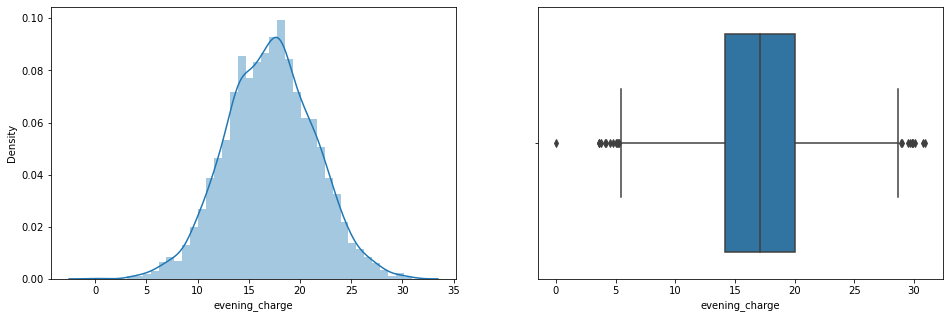

In [110]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["evening_charge"])

plt.subplot(1,2,2)
sns.boxplot(df["evening_charge"])

plt.show()

In [111]:
# Remove Outliers using z-score
print("Mean value of evening_charge",df["evening_charge"].mean())
print("std value of evening_charge",df["evening_charge"].std())
print("Max value of evening_charge",df["evening_charge"].max())
print("Min value of evening_charge",df["evening_charge"].min())

Mean value of evening_charge 17.092363914373085
std value of evening_charge 4.300523747757906
Max value of evening_charge 30.91
Min value of evening_charge 0.0


In [112]:
# Calculating the Z-Score
df["evening_charge z-score"]=(df["evening_charge"]-df["evening_charge"].mean())/df["evening_charge"].std()

In [113]:
# Checking those outliers that are greater than 3
df[df["evening_charge z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score
2325,46,1,34,191.4,361.8,147.5,7.2,1,0,102,...,0,-1.389550,0.212087,3.167596,-1.055062,49.294665,0.080474,0.214531,-0.209524,3.175808
2545,102,0,0,129.5,354.2,145.5,10.9,1,0,56,...,0,0.030473,-0.923182,3.017817,-1.094613,48.576353,-2.212390,-0.922162,0.897166,3.026989
2726,130,0,0,216.2,363.7,126.7,16.9,5,1,106,...,1,0.740485,0.666928,3.205041,-1.466396,41.824224,0.279854,0.669424,-0.712565,3.213012


In [114]:
# Checking those outliers that are less than -3
df[df["evening_charge z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score
532,125,1,36,201.3,42.2,125.7,5.4,1,0,117,...,0,0.613697,0.393656,-3.131014,-1.486171,41.465068,0.828148,0.396056,-1.114997,-3.139702
819,80,0,0,105.8,43.9,189.6,13.1,0,0,110,...,0,-0.527393,-1.357849,-3.097511,-0.222507,64.415125,0.479233,-1.357606,-0.611956,-3.107148
887,103,0,0,198.5,42.5,179.2,12.4,0,0,112,...,0,0.055831,0.342303,-3.125102,-0.428174,60.679904,0.578923,0.345272,-0.511348,-3.135052
1231,48,0,0,128.2,48.1,116.3,8.9,0,0,71,...,0,-1.338834,-0.947025,-3.014738,-1.672062,38.089004,-1.464717,-0.947013,-1.114997,-3.023437
1954,38,0,0,149.0,49.2,163.3,13.9,0,0,92,...,0,-1.592410,-0.565545,-2.993059,-0.742607,54.969327,-0.417975,-0.564514,-1.114997,-3.002510
2926,97,0,0,209.2,0.0,175.4,11.8,1,0,134,...,0,-0.096314,0.538545,-3.962683,-0.503321,59.315112,1.675511,0.540844,-5.038717,-3.974484


In [115]:
outlier_Ec=df[(df["evening_charge z-score"] > 3) | (df["evening_charge z-score"] < -3)]
print(outlier_Ec.shape)
outlier_Ec

(9, 28)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score
532,125,1,36,201.3,42.2,125.7,5.4,1,0,117,...,0,0.613697,0.393656,-3.131014,-1.486171,41.465068,0.828148,0.396056,-1.114997,-3.139702
819,80,0,0,105.8,43.9,189.6,13.1,0,0,110,...,0,-0.527393,-1.357849,-3.097511,-0.222507,64.415125,0.479233,-1.357606,-0.611956,-3.107148
887,103,0,0,198.5,42.5,179.2,12.4,0,0,112,...,0,0.055831,0.342303,-3.125102,-0.428174,60.679904,0.578923,0.345272,-0.511348,-3.135052
1231,48,0,0,128.2,48.1,116.3,8.9,0,0,71,...,0,-1.338834,-0.947025,-3.014738,-1.672062,38.089004,-1.464717,-0.947013,-1.114997,-3.023437
1954,38,0,0,149.0,49.2,163.3,13.9,0,0,92,...,0,-1.592410,-0.565545,-2.993059,-0.742607,54.969327,-0.417975,-0.564514,-1.114997,-3.002510
2325,46,1,34,191.4,361.8,147.5,7.2,1,0,102,...,0,-1.389550,0.212087,3.167596,-1.055062,49.294665,0.080474,0.214531,-0.209524,3.175808
2545,102,0,0,129.5,354.2,145.5,10.9,1,0,56,...,0,0.030473,-0.923182,3.017817,-1.094613,48.576353,-2.212390,-0.922162,0.897166,3.026989
2726,130,0,0,216.2,363.7,126.7,16.9,5,1,106,...,1,0.740485,0.666928,3.205041,-1.466396,41.824224,0.279854,0.669424,-0.712565,3.213012
2926,97,0,0,209.2,0.0,175.4,11.8,1,0,134,...,0,-0.096314,0.538545,-3.962683,-0.503321,59.315112,1.675511,0.540844,-5.038717,-3.974484


In [116]:
df.drop([8, 1960], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,0,0.689770,1.563772,-0.072365,0.867131,84.204610,0.479233,1.568406,-0.058611,-0.072634
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,0,0.157261,-0.334456,-0.109810,1.058955,87.688421,1.127217,-0.333286,0.142605,-0.109839
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,0,0.917988,1.165786,-1.574099,-0.756450,54.717918,0.678613,1.169699,0.494734,-1.579427
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,0,-0.425963,2.192847,-2.742770,-0.078145,67.036962,-1.464717,2.198341,-0.611956,-2.751377
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,0,-0.654181,-0.240921,-1.040017,-0.275901,63.445404,0.628768,-0.239282,1.098383,-1.042283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,78,0,0,193.4,116.9,243.3,9.3,2,0,99,...,0,-0.578108,0.248767,-1.658842,0.839445,83.701792,-0.069060,0.251268,-0.611956,-1.663138
3319,96,0,0,106.6,284.8,178.9,14.9,1,0,128,...,0,-0.121672,-1.343177,1.650096,-0.434107,60.572158,1.376441,-1.343559,-0.662260,1.655063
3321,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,0,2.312653,-0.433494,0.284346,1.547413,96.559570,-1.165648,-0.432692,1.299599,0.285462
3324,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,0,2.109792,0.622911,-0.817319,-1.219200,46.313672,0.230009,0.626204,-0.813173,-0.819055


# 13.night_calls

c:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


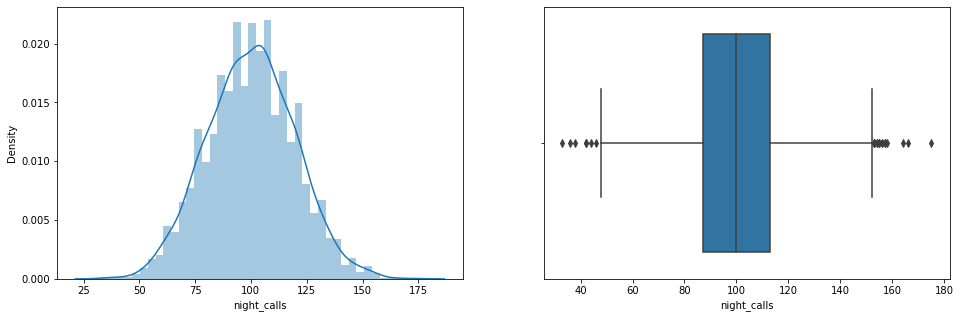

In [117]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["night_calls"])

plt.subplot(1,2,2)
sns.boxplot(df["night_calls"])

plt.show()

In [118]:
# Remove Outliers using z-score
print("Mean value of night_calls",df["night_calls"].mean())
print("std value of night_calls",df["night_calls"].std())
print("Max value of night_calls",df["night_calls"].max())
print("Min value of night_calls",df["night_calls"].min())

Mean value of night_calls 100.07129742962056
std value of night_calls 19.61158172225995
Max value of night_calls 175
Min value of night_calls 33


In [119]:
# Calculating the Z-Score
df["night_calls z-score"]=(df["night_calls"]-df["night_calls"].mean())/df["night_calls"].std()

In [120]:
# Checking those outliers that are greater than 3
df[df["night_calls z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score
492,129,1,33,119.6,278.7,263.4,5.9,2,0,104,...,0.715127,-1.104752,1.529878,1.236936,90.920824,0.180164,-1.104767,-0.611956,1.534147,3.820635
2282,34,0,0,193.7,126.9,221.2,8.8,0,0,74,...,-1.693840,0.254270,-1.461764,0.402403,75.764448,-1.315182,0.256671,-0.813173,-1.465488,3.361723
3205,103,0,0,70.9,134.5,168.8,12.0,2,0,134,...,0.055831,-1.997928,-1.311985,-0.633841,56.944684,1.675511,-1.999427,0.595342,-1.316668,3.259742


In [121]:
# Checking those outliers that are less than -3
df[df["night_calls z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score
2653,15,0,0,121.1,216.0,235.1,16.1,2,0,130,...,-2.175634,-1.077242,0.294200,0.677285,80.756714,1.476131,-1.076674,-0.712565,0.294763,-3.419984
2897,97,1,32,183.4,269.1,203.5,6.7,5,0,94,...,-0.096314,0.065364,1.340684,0.052374,69.407391,-0.318285,0.067582,0.997775,1.343473,-3.165033
2982,105,0,0,259.3,175.2,222.4,12.0,3,0,96,...,0.106546,1.457398,-0.509878,0.426134,76.195435,-0.218595,1.461436,-0.159220,-0.512115,-3.267013


In [122]:
outlier_Nca=df[(df["night_calls z-score"] > 3) | (df["night_calls z-score"] < -3)]
print(outlier_Nca.shape)
outlier_Nca

(6, 29)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score
492,129,1,33,119.6,278.7,263.4,5.9,2,0,104,...,0.715127,-1.104752,1.529878,1.236936,90.920824,0.180164,-1.104767,-0.611956,1.534147,3.820635
2282,34,0,0,193.7,126.9,221.2,8.8,0,0,74,...,-1.693840,0.254270,-1.461764,0.402403,75.764448,-1.315182,0.256671,-0.813173,-1.465488,3.361723
2653,15,0,0,121.1,216.0,235.1,16.1,2,0,130,...,-2.175634,-1.077242,0.294200,0.677285,80.756714,1.476131,-1.076674,-0.712565,0.294763,-3.419984
2897,97,1,32,183.4,269.1,203.5,6.7,5,0,94,...,-0.096314,0.065364,1.340684,0.052374,69.407391,-0.318285,0.067582,0.997775,1.343473,-3.165033
2982,105,0,0,259.3,175.2,222.4,12.0,3,0,96,...,0.106546,1.457398,-0.509878,0.426134,76.195435,-0.218595,1.461436,-0.159220,-0.512115,-3.267013
3205,103,0,0,70.9,134.5,168.8,12.0,2,0,134,...,0.055831,-1.997928,-1.311985,-0.633841,56.944684,1.675511,-1.999427,0.595342,-1.316668,3.259742


In [123]:
df.drop([493, 2288, 2659, 2903, 2988, 3211], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,0.689770,1.563772,-0.072365,0.867131,84.204610,0.479233,1.568406,-0.058611,-0.072634,-0.462548
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,0.157261,-0.334456,-0.109810,1.058955,87.688421,1.127217,-0.333286,0.142605,-0.109839,0.149335
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,0.917988,1.165786,-1.574099,-0.756450,54.717918,0.678613,1.169699,0.494734,-1.579427,0.200326
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,-0.425963,2.192847,-2.742770,-0.078145,67.036962,-1.464717,2.198341,-0.611956,-2.751377,-0.564529
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,-0.654181,-0.240921,-1.040017,-0.275901,63.445404,0.628768,-0.239282,1.098383,-1.042283,1.067160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,78,0,0,193.4,116.9,243.3,9.3,2,0,99,...,-0.578108,0.248767,-1.658842,0.839445,83.701792,-0.069060,0.251268,-0.611956,-1.663138,0.455277
3319,96,0,0,106.6,284.8,178.9,14.9,1,0,128,...,-0.121672,-1.343177,1.650096,-0.434107,60.572158,1.376441,-1.343559,-0.662260,1.655063,-0.411558
3321,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,2.312653,-0.433494,0.284346,1.547413,96.559570,-1.165648,-0.432692,1.299599,0.285462,-0.870470
3324,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,2.109792,0.622911,-0.817319,-1.219200,46.313672,0.230009,0.626204,-0.813173,-0.819055,1.883005


# 14. night_charge

c:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


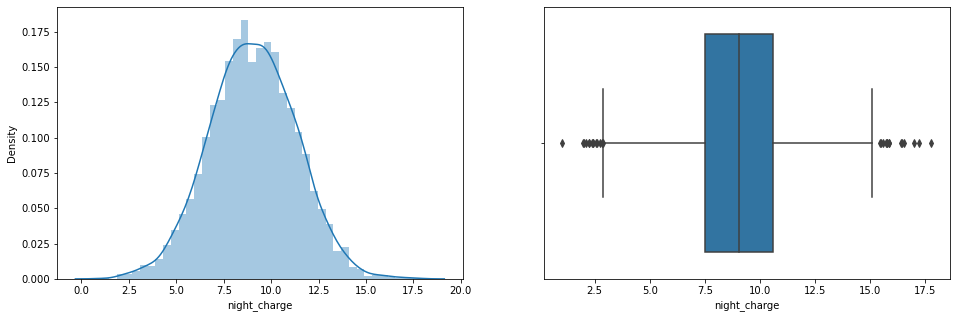

In [124]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["night_charge"])

plt.subplot(1,2,2)
sns.boxplot(df["night_charge"])

plt.show()

In [125]:
# Remove Outliers using z-score
print("Mean value of night_charge",df["night_charge"].mean())
print("std value of night_charge",df["night_charge"].std())
print("Max value of night_charge",df["night_charge"].max())
print("Min value of night_charge",df["night_charge"].min())

Mean value of night_charge 9.03600551808708
std value of night_charge 2.279214685032176
Max value of night_charge 17.77
Min value of night_charge 1.04


In [126]:
# Calculating the Z-Score
df["night_charge z-score"]=(df["night_charge"]-df["night_charge"].mean())/df["night_charge"].std()

In [127]:
# Checking those outliers that are greater than 3
df[df["night_charge z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score
920,80,0,0,239.9,142.3,364.3,9.3,1,0,121,...,1.101595,-1.158264,3.232299,127.159645,1.027527,1.104868,-2.473208,-1.160873,0.302306,3.226548
1315,89,1,29,163.5,274.8,381.9,7.5,2,0,80,...,-0.299610,1.453018,3.580350,133.480788,-1.016113,-0.297629,1.802640,1.457412,2.392908,3.577546
1442,55,1,8,222.5,171.5,377.5,9.7,1,0,104,...,0.782472,-0.582797,3.493337,131.900502,0.180164,0.786119,-0.310132,-0.584200,0.710228,3.489796
2315,153,0,0,154.6,263.0,367.7,15.5,1,0,56,...,-0.462839,1.220466,3.299536,128.380775,-2.212390,-0.461866,-0.813173,1.224882,-0.564529,3.296747
2657,172,0,0,169.8,183.1,395.0,12.7,2,0,123,...,-0.184065,-0.354186,3.839411,138.185729,1.127217,-0.182015,-0.310132,-0.356320,-1.431363,3.832019
3101,73,0,0,157.6,198.3,364.9,9.1,1,0,92,...,-0.407818,-0.054628,3.244164,127.375139,-0.417975,-0.406760,-0.662260,-0.054032,0.302306,3.239710


In [128]:
# Checking those outliers that are less than -3
df[df["night_charge z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score
881,42,0,0,146.3,255.9,45.0,8.0,1,0,84,...,-0.615064,1.080541,-3.082066,12.481194,-0.816734,-0.614217,0.645646,1.083039,0.863199,-3.073868
1111,152,0,0,206.3,292.8,43.7,10.6,1,0,98,...,0.485358,1.807758,-3.107775,12.014292,-0.118905,0.487899,-0.913781,1.813183,1.067160,-3.100193
1258,76,1,22,160.1,168.7,23.2,9.5,3,0,107,...,-0.361967,-0.637979,-3.513175,4.651597,0.329699,-0.360298,1.802640,-0.640007,0.098345,-3.508228
3240,146,0,0,138.4,158.9,47.4,3.9,4,0,104,...,-0.759953,-0.831115,-3.034605,13.343168,0.180164,-0.759005,1.098383,-0.833006,-1.380373,-3.029993


In [129]:
outlier_Nc=df[(df["night_charge z-score"] > 3) | (df["night_charge z-score"] < -3)]
print(outlier_Nc.shape)
outlier_Nc

(10, 30)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score
881,42,0,0,146.3,255.9,45.0,8.0,1,0,84,...,-0.615064,1.080541,-3.082066,12.481194,-0.816734,-0.614217,0.645646,1.083039,0.863199,-3.073868
920,80,0,0,239.9,142.3,364.3,9.3,1,0,121,...,1.101595,-1.158264,3.232299,127.159645,1.027527,1.104868,-2.473208,-1.160873,0.302306,3.226548
1111,152,0,0,206.3,292.8,43.7,10.6,1,0,98,...,0.485358,1.807758,-3.107775,12.014292,-0.118905,0.487899,-0.913781,1.813183,1.067160,-3.100193
1258,76,1,22,160.1,168.7,23.2,9.5,3,0,107,...,-0.361967,-0.637979,-3.513175,4.651597,0.329699,-0.360298,1.802640,-0.640007,0.098345,-3.508228
1315,89,1,29,163.5,274.8,381.9,7.5,2,0,80,...,-0.299610,1.453018,3.580350,133.480788,-1.016113,-0.297629,1.802640,1.457412,2.392908,3.577546
1442,55,1,8,222.5,171.5,377.5,9.7,1,0,104,...,0.782472,-0.582797,3.493337,131.900502,0.180164,0.786119,-0.310132,-0.584200,0.710228,3.489796
2315,153,0,0,154.6,263.0,367.7,15.5,1,0,56,...,-0.462839,1.220466,3.299536,128.380775,-2.212390,-0.461866,-0.813173,1.224882,-0.564529,3.296747
2657,172,0,0,169.8,183.1,395.0,12.7,2,0,123,...,-0.184065,-0.354186,3.839411,138.185729,1.127217,-0.182015,-0.310132,-0.356320,-1.431363,3.832019
3101,73,0,0,157.6,198.3,364.9,9.1,1,0,92,...,-0.407818,-0.054628,3.244164,127.375139,-0.417975,-0.406760,-0.662260,-0.054032,0.302306,3.239710
3240,146,0,0,138.4,158.9,47.4,3.9,4,0,104,...,-0.759953,-0.831115,-3.034605,13.343168,0.180164,-0.759005,1.098383,-0.833006,-1.380373,-3.029993


In [130]:
df.drop([1072, 1238, 2754, 2756, 3060], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,1.563772,-0.072365,0.867131,84.204610,0.479233,1.568406,-0.058611,-0.072634,-0.462548,0.866085
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,-0.334456,-0.109810,1.058955,87.688421,1.127217,-0.333286,0.142605,-0.109839,0.149335,1.059134
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,1.165786,-1.574099,-0.756450,54.717918,0.678613,1.169699,0.494734,-1.579427,0.200326,-0.752893
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,2.192847,-2.742770,-0.078145,67.036962,-1.464717,2.198341,-0.611956,-2.751377,-0.564529,-0.077222
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,-0.240921,-1.040017,-0.275901,63.445404,0.628768,-0.239282,1.098383,-1.042283,1.067160,-0.274658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,78,0,0,193.4,116.9,243.3,9.3,2,0,99,...,0.248767,-1.658842,0.839445,83.701792,-0.069060,0.251268,-0.611956,-1.663138,0.455277,0.839761
3319,96,0,0,106.6,284.8,178.9,14.9,1,0,128,...,-1.343177,1.650096,-0.434107,60.572158,1.376441,-1.343559,-0.662260,1.655063,-0.411558,-0.432608
3321,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,-0.433494,0.284346,1.547413,96.559570,-1.165648,-0.432692,1.299599,0.285462,-0.870470,1.546144
3324,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,0.622911,-0.817319,-1.219200,46.313672,0.230009,0.626204,-0.813173,-0.819055,1.883005,-1.217966


# 15.international_calls

c:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


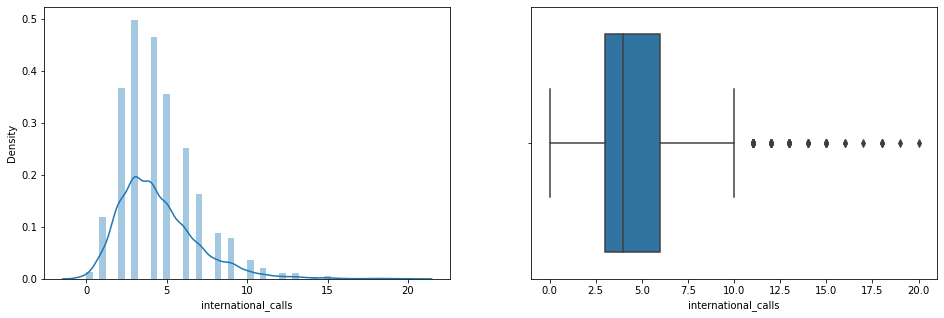

In [131]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["international_calls"])

plt.subplot(1,2,2)
sns.boxplot(df["international_calls"])

plt.show()

In [132]:
# Finding IQR
Percentile25=df["international_calls"].quantile(0.25)
print("Percentile 25 :",Percentile25)
Percentile75=df["international_calls"].quantile(0.75)
print("Percentile 75 :",Percentile75)

Percentile 25 : 3.0
Percentile 75 : 6.0


In [133]:
iqr=Percentile75-Percentile25
print("IQR :",iqr)

IQR : 3.0


In [134]:
upper_limit=Percentile75+1.5*iqr
print("Upper Limit",upper_limit)
lower_limit=Percentile25-1.5*iqr
print("Lower Limit",lower_limit)

Upper Limit 10.5
Lower Limit -1.5


In [135]:
Ul=df[df["international_calls"]>upper_limit]
Ul.shape

(78, 30)

In [136]:
Ll=df[df["international_calls"]<lower_limit]
Ll.shape

(0, 30)

In [137]:
outlier_Ica=df[(df["international_calls"]>upper_limit ) | (df["international_calls"]<lower_limit)]
print(outlier_Ica.shape)
outlier_Ica

(78, 30)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score
22,130,0,0,183.0,72.9,181.8,9.5,0,0,112,...,0.058028,-2.525985,-0.376757,61.613709,0.578923,0.060019,-0.058611,-2.532799,-1.125422,-0.375570
41,135,1,41,173.1,203.9,122.2,14.6,0,1,85,...,-0.123542,0.055736,-1.555386,40.208023,-0.766889,-0.121506,0.343821,0.055257,-1.125422,-1.551414
153,56,0,0,226.0,248.5,140.5,6.9,1,0,112,...,0.846664,0.934703,-1.193492,46.780574,0.578923,0.849869,0.897166,0.936545,2.137956,-1.191641
182,67,1,36,115.6,237.7,169.9,9.9,2,0,111,...,-1.178114,0.721859,-0.612088,57.339755,0.529078,-1.178242,-0.310132,0.722618,0.149335,-0.608107
185,73,0,0,214.3,268.5,241.2,10.8,1,0,145,...,0.632081,1.328859,0.797916,82.947565,2.223804,0.634848,1.752336,1.331846,-0.411558,0.795886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,16,0,0,161.9,230.1,148.8,10.2,3,0,100,...,-0.328954,0.572080,-1.029354,49.761568,-0.019215,-0.327883,1.903248,0.573799,-1.125422,-1.024917
3200,143,0,0,133.4,223.9,180.4,10.2,1,0,107,...,-0.851655,0.449892,-0.404443,61.110891,0.329699,-0.850848,0.846862,0.450558,-0.768490,-0.401895
3223,87,0,0,186.9,182.6,143.1,4.2,1,0,79,...,0.129555,-0.364040,-1.142075,47.714379,-1.065958,0.131332,0.243213,-0.365621,-0.513538,-1.138991
3284,119,1,22,172.1,223.6,150.0,13.9,1,1,119,...,-0.141883,0.443979,-1.005623,50.192555,0.927837,-0.139875,1.651728,0.445908,-0.309577,-1.002979


# 16.international_charge

c:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


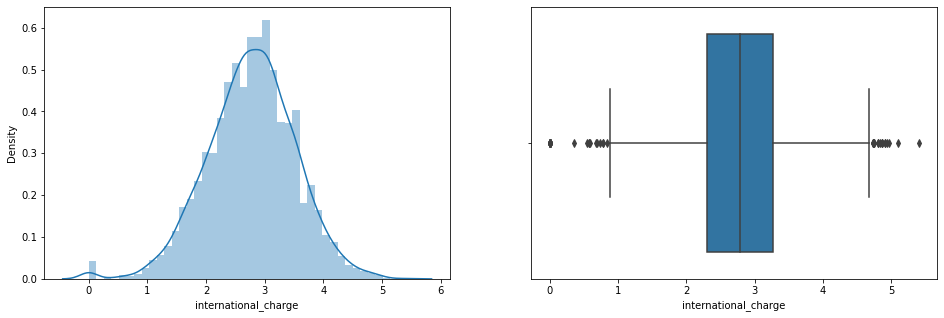

In [138]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["international_charge"])

plt.subplot(1,2,2)
sns.boxplot(df["international_charge"])

plt.show()

In [139]:
# Remove Outliers using z-score
print("Mean value of international_charge",df["international_charge"].mean())
print("std value of international_charge",df["international_charge"].std())
print("Max value of international_charge",df["international_charge"].max())
print("Min value of international_charge",df["international_charge"].min())

Mean value of international_charge 2.7694135707706375
std value of international_charge 0.7505307253899456
Max value of international_charge 5.4
Min value of international_charge 0.0


In [140]:
# Calculating the Z-Score
df["international_charge z-score"]=(df["international_charge"]-df["international_charge"].mean())/df["international_charge"].std()

In [141]:
# Checking those outliers that are greater than 3
df[df["international_charge z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score,international_charge z-score
115,36,1,42,196.8,254.9,138.3,20.0,0,1,89,...,1.060833,-1.236998,45.990432,-0.567509,0.313938,1.098383,1.064437,1.322112,-1.235516,3.504968
314,128,0,0,125.2,205.4,254.4,18.9,0,0,99,...,0.085297,1.058955,87.688421,-0.069060,-1.002119,0.343821,0.085486,0.557258,1.059134,3.105251


In [142]:
# Checking those outliers that are less than -3
df[df["international_charge z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score,international_charge z-score
179,70,0,0,232.1,292.3,201.2,0.0,3,0,122,...,1.797904,0.006890,68.581332,1.077372,0.962242,0.595342,1.803882,0.608248,0.006140,-3.689940
343,98,1,21,64.6,176.1,244.8,0.0,2,0,98,...,-0.492141,0.869109,84.240526,-0.118905,-2.115041,-0.712565,-0.493513,-0.819480,0.870473,-3.689940
487,165,0,0,242.9,209.8,228.4,0.0,1,0,126,...,0.172012,0.544788,78.350370,1.276752,1.159974,-1.768951,0.171522,1.322112,0.545800,-3.689940
594,87,1,28,151.4,152.4,250.1,0.0,1,0,95,...,-0.959215,0.973920,86.144051,-0.268440,-0.520213,-0.159220,-0.963223,0.455277,0.971385,-3.689940
711,106,0,0,114.4,78.3,232.7,0.0,2,0,104,...,-2.419563,0.629823,79.894740,0.180164,-1.199852,0.041997,-2.425836,-1.125422,0.629162,-3.689940
761,161,0,0,189.6,267.4,184.5,1.3,1,1,78,...,1.307180,-0.323363,62.583430,-1.115803,0.181035,0.846862,1.310918,1.883005,-0.322921,-3.223604
876,62,0,0,281.0,160.6,77.9,0.0,1,0,66,...,-0.797612,-2.431447,24.297420,-1.713942,1.860142,0.394126,-0.800452,-1.329383,-2.424522,-3.689940
1026,70,0,0,222.8,215.9,223.5,0.0,1,0,114,...,0.292229,0.447887,76.590507,0.678613,0.791522,0.645646,0.292438,1.118151,0.449275,-3.689940
1078,114,0,0,191.5,175.2,220.3,0.0,0,0,88,...,-0.509878,0.384605,75.441208,-0.617354,0.216692,-1.114997,-0.512115,0.914190,0.383463,-3.689940
1398,115,0,0,132.0,197.5,175.8,0.0,3,0,90,...,-0.070394,-0.495411,59.458775,-0.517664,-0.876780,-1.265910,-0.070309,0.710228,-0.494032,-3.689940


In [143]:
outlier_Ic=df[(df["international_charge z-score"] > 3) | (df["international_charge z-score"] < -3)]
print(outlier_Ic.shape)
outlier_Ic

(21, 31)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score,international_charge z-score
115,36,1,42,196.8,254.9,138.3,20.0,0,1,89,...,1.060833,-1.236998,45.990432,-0.567509,0.313938,1.098383,1.064437,1.322112,-1.235516,3.504968
179,70,0,0,232.1,292.3,201.2,0.0,3,0,122,...,1.797904,0.006890,68.581332,1.077372,0.962242,0.595342,1.803882,0.608248,0.006140,-3.689940
314,128,0,0,125.2,205.4,254.4,18.9,0,0,99,...,0.085297,1.058955,87.688421,-0.069060,-1.002119,0.343821,0.085486,0.557258,1.059134,3.105251
343,98,1,21,64.6,176.1,244.8,0.0,2,0,98,...,-0.492141,0.869109,84.240526,-0.118905,-2.115041,-0.712565,-0.493513,-0.819480,0.870473,-3.689940
487,165,0,0,242.9,209.8,228.4,0.0,1,0,126,...,0.172012,0.544788,78.350370,1.276752,1.159974,-1.768951,0.171522,1.322112,0.545800,-3.689940
594,87,1,28,151.4,152.4,250.1,0.0,1,0,95,...,-0.959215,0.973920,86.144051,-0.268440,-0.520213,-0.159220,-0.963223,0.455277,0.971385,-3.689940
711,106,0,0,114.4,78.3,232.7,0.0,2,0,104,...,-2.419563,0.629823,79.894740,0.180164,-1.199852,0.041997,-2.425836,-1.125422,0.629162,-3.689940
761,161,0,0,189.6,267.4,184.5,1.3,1,1,78,...,1.307180,-0.323363,62.583430,-1.115803,0.181035,0.846862,1.310918,1.883005,-0.322921,-3.223604
876,62,0,0,281.0,160.6,77.9,0.0,1,0,66,...,-0.797612,-2.431447,24.297420,-1.713942,1.860142,0.394126,-0.800452,-1.329383,-2.424522,-3.689940
1026,70,0,0,222.8,215.9,223.5,0.0,1,0,114,...,0.292229,0.447887,76.590507,0.678613,0.791522,0.645646,0.292438,1.118151,0.449275,-3.689940


# 17.total_charge

c:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


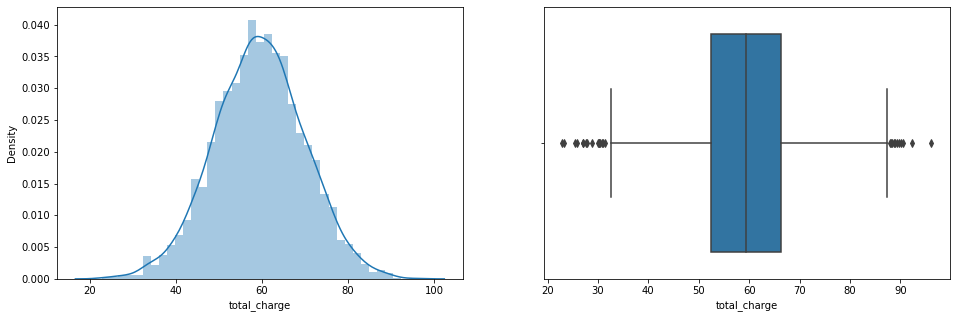

In [144]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["total_charge"])

plt.subplot(1,2,2)
sns.boxplot(df["total_charge"])

plt.show()

In [145]:
print("Mean value of total_charge",df["total_charge"].mean())
print("std value of total_charge",df["total_charge"].std())
print("Max value of total_charge",df["total_charge"].max())
print("Min value of total_charge",df["total_charge"].min())

Mean value of total_charge 59.438652133865446
std value of total_charge 10.485182055957859
Max value of total_charge 96.15
Min value of total_charge 22.93


In [146]:
# Calculating the Z-Score
df["total_charge z-score"]=(df["total_charge"]-df["total_charge"].mean())/df["total_charge"].std()

In [147]:
# Checking those outliers that are greater than 3
df[df["total_charge z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score,international_charge z-score,total_charge z-score
15,161,0,0,332.9,317.8,160.6,5.4,4,0,67,...,-0.796001,53.999606,-1.664097,2.813149,-0.159220,2.306146,1.424092,-0.792381,-1.744650,3.133121
983,64,0,0,346.8,249.5,275.4,13.3,1,1,55,...,1.474244,95.230694,-2.262235,3.069229,-1.064693,0.957473,0.098345,1.471557,1.093342,3.501260


In [148]:
# Checking those outliers that are less than -3
df[df["total_charge z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score,international_charge z-score,total_charge z-score
77,144,0,0,61.6,77.1,173.0,8.2,4,0,117,...,-0.550783,58.453138,0.828148,-2.170147,-0.762869,-2.451414,-0.054626,-0.546682,-0.745357,-3.091854
647,131,1,39,69.1,101.3,104.8,9.1,0,0,122,...,-1.899482,33.958712,1.077372,-2.031842,1.802640,-1.972403,-0.309577,-1.893637,-0.412260,-3.042260
1343,98,0,0,0.0,159.6,167.1,6.8,4,0,0,...,-0.667459,56.334119,-5.003704,-3.301437,1.500816,-0.819055,-0.615519,-0.665144,-1.238342,-3.481928
1395,101,0,0,0.0,192.1,168.8,7.2,1,0,0,...,-0.633841,56.944684,-5.003704,-3.301437,0.947471,-0.177272,-0.258587,-0.630044,-1.105103,-3.201533
1617,138,1,21,19.5,140.9,179.7,7.9,0,0,149,...,-0.418286,60.859482,2.423184,-2.942709,0.444430,-1.188777,0.557258,-0.415058,-0.851949,-3.234913
1980,70,0,0,7.9,136.4,156.6,12.1,0,0,100,...,-0.875104,52.562983,-0.019215,-3.156649,-0.863477,-1.279464,-0.564529,-0.871355,0.666977,-3.451409
2747,134,0,0,7.8,171.4,186.5,12.9,2,0,86,...,-0.283812,63.301742,-0.717044,-3.157729,-0.008307,-0.586525,-1.023441,-0.283433,0.946779,-3.020324
2853,87,0,0,58.0,67.5,185.9,11.5,0,0,125,...,-0.295677,63.086248,1.226907,-2.236057,0.796558,-2.639763,1.832015,-0.292208,0.453794,-3.086132


In [149]:
outlier_Tc=df[(df["total_charge z-score"] > 3) | (df["total_charge z-score"] < -3)]
print(outlier_Tc.shape)
outlier_Tc

(10, 32)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score,international_charge z-score,total_charge z-score
15,161,0,0,332.9,317.8,160.6,5.4,4,0,67,...,-0.796001,53.999606,-1.664097,2.813149,-0.159220,2.306146,1.424092,-0.792381,-1.744650,3.133121
77,144,0,0,61.6,77.1,173.0,8.2,4,0,117,...,-0.550783,58.453138,0.828148,-2.170147,-0.762869,-2.451414,-0.054626,-0.546682,-0.745357,-3.091854
647,131,1,39,69.1,101.3,104.8,9.1,0,0,122,...,-1.899482,33.958712,1.077372,-2.031842,1.802640,-1.972403,-0.309577,-1.893637,-0.412260,-3.042260
983,64,0,0,346.8,249.5,275.4,13.3,1,1,55,...,1.474244,95.230694,-2.262235,3.069229,-1.064693,0.957473,0.098345,1.471557,1.093342,3.501260
1343,98,0,0,0.0,159.6,167.1,6.8,4,0,0,...,-0.667459,56.334119,-5.003704,-3.301437,1.500816,-0.819055,-0.615519,-0.665144,-1.238342,-3.481928
1395,101,0,0,0.0,192.1,168.8,7.2,1,0,0,...,-0.633841,56.944684,-5.003704,-3.301437,0.947471,-0.177272,-0.258587,-0.630044,-1.105103,-3.201533
1617,138,1,21,19.5,140.9,179.7,7.9,0,0,149,...,-0.418286,60.859482,2.423184,-2.942709,0.444430,-1.188777,0.557258,-0.415058,-0.851949,-3.234913
1980,70,0,0,7.9,136.4,156.6,12.1,0,0,100,...,-0.875104,52.562983,-0.019215,-3.156649,-0.863477,-1.279464,-0.564529,-0.871355,0.666977,-3.451409
2747,134,0,0,7.8,171.4,186.5,12.9,2,0,86,...,-0.283812,63.301742,-0.717044,-3.157729,-0.008307,-0.586525,-1.023441,-0.283433,0.946779,-3.020324
2853,87,0,0,58.0,67.5,185.9,11.5,0,0,125,...,-0.295677,63.086248,1.226907,-2.236057,0.796558,-2.639763,1.832015,-0.292208,0.453794,-3.086132


In [150]:
df.drop([15, 77, 648, 1621, 2859], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score,international_charge z-score,total_charge z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,0.867131,84.204610,0.479233,1.568406,-0.058611,-0.072634,-0.462548,0.866085,-0.092486,1.537536
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,1.058955,87.688421,1.127217,-0.333286,0.142605,-0.109839,0.149335,1.059134,1.239905,-0.018946
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,-0.756450,54.717918,0.678613,1.169699,0.494734,-1.579427,0.200326,-0.752893,0.693624,0.271941
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,-0.078145,67.036962,-1.464717,2.198341,-0.611956,-2.751377,-0.564529,-0.077222,-1.318285,0.702072
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,-0.275901,63.445404,0.628768,-0.239282,1.098383,-1.042283,1.067160,-0.274658,-0.052514,-0.700861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,78,0,0,193.4,116.9,243.3,9.3,2,0,99,...,0.839445,83.701792,-0.069060,0.251268,-0.611956,-1.663138,0.455277,0.839761,-0.345640,-0.301249
3319,96,0,0,106.6,284.8,178.9,14.9,1,0,128,...,-0.434107,60.572158,1.376441,-1.343559,-0.662260,1.655063,-0.411558,-0.432608,1.666269,-0.480550
3321,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,1.547413,96.559570,-1.165648,-0.432692,1.299599,0.285462,-0.870470,1.546144,-0.132458,0.063075
3324,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,-1.219200,46.313672,0.230009,0.626204,-0.813173,-0.819055,1.883005,-1.217966,-1.891213,-0.182033


# 18. churn

c:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


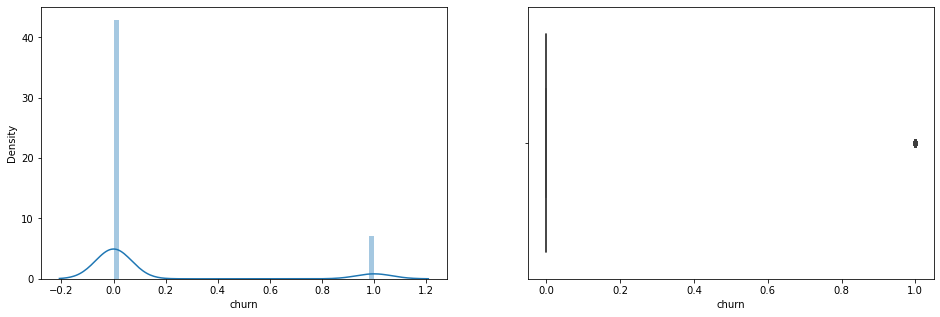

In [151]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["churn"])

plt.subplot(1,2,2)
sns.boxplot(df["churn"])

plt.show()

In [152]:
# Finding IQR
Percentile25=df["churn"].quantile(0.25)
print("Percentile 25 :",Percentile25)
Percentile75=df["churn"].quantile(0.75)
print("Percentile 75 :",Percentile75)

Percentile 25 : 0.0
Percentile 75 : 0.0


In [153]:
iqr=Percentile75-Percentile25
print("IQR :",iqr)

IQR : 0.0


In [154]:
upper_limit=Percentile75+1.5*iqr
print("Upper Limit",upper_limit)
lower_limit=Percentile25-1.5*iqr
print("Lower Limit",lower_limit)

Upper Limit 0.0
Lower Limit 0.0


In [155]:
Ul=df[df["churn"]>upper_limit]
Ul.shape

(463, 32)

In [156]:
Ll=df[df["churn"]<lower_limit]
Ll.shape

(0, 32)

In [157]:
outlier_churn=df[(df["churn"]>upper_limit ) | (df["churn"]<lower_limit)]
print(outlier_churn.shape)
outlier_churn

(463, 32)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score,international_charge z-score,total_charge z-score
10,65,0,0,129.1,228.5,208.8,12.7,4,0,137,...,0.157185,71.310916,1.825045,-0.929725,-0.863477,0.541245,0.557258,0.159702,0.880159,-0.499624
21,77,0,0,62.4,169.9,209.6,5.7,5,0,89,...,0.173006,71.598241,-0.567509,-2.155019,1.048079,-0.616754,-1.839285,0.172864,-1.638059,-2.233500
33,12,0,0,249.6,252.4,280.2,11.8,1,0,118,...,1.569167,96.954641,0.877992,1.283152,0.947471,1.013280,-0.513538,1.568082,0.560385,1.930472
41,135,1,41,173.1,203.9,122.2,14.6,0,1,85,...,-1.555386,40.208023,-0.766889,-0.121506,0.343821,0.055257,-1.125422,-1.551414,1.559678,-0.308879
48,119,0,0,159.1,231.3,143.2,8.8,5,0,114,...,-1.140097,47.750295,0.678613,-0.378667,0.846862,0.597052,-0.462548,-1.138991,-0.518851,-0.372779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,84,0,0,280.0,202.2,156.8,10.4,0,0,113,...,-0.871149,52.634814,0.628768,1.841774,-0.511348,0.022703,0.149335,-0.866968,0.054077,1.451701
3297,71,0,0,186.1,198.6,206.5,13.8,4,1,114,...,0.111701,70.484858,0.678613,0.117286,2.003857,-0.049381,-1.023441,0.111439,1.279876,0.200411
3313,122,0,0,140.0,196.4,120.1,9.7,4,1,101,...,-1.596915,39.453796,0.030629,-0.729831,-1.165301,-0.093562,1.679044,-1.595289,-0.199077,-1.042295
3315,62,0,0,321.1,265.5,180.5,11.5,4,0,105,...,-0.402466,61.146807,0.230009,2.597048,1.098383,1.273714,-1.431363,-0.401895,0.453794,2.761168


In [158]:
df.shape

(3252, 32)

# Plots

In [159]:
#removal of un necessary columns
df.drop(['account_length z-score','day_mins z-score','evening_mins z-score','night_mins z-score','international_mins z-score','day_calls z-score','day_charge z-score','evening_calls z-score','evening_charge z-score','night_calls z-score','night_charge z-score','international_charge z-score','total_charge z-score'],axis=1, inplace=True)

<AxesSubplot:>

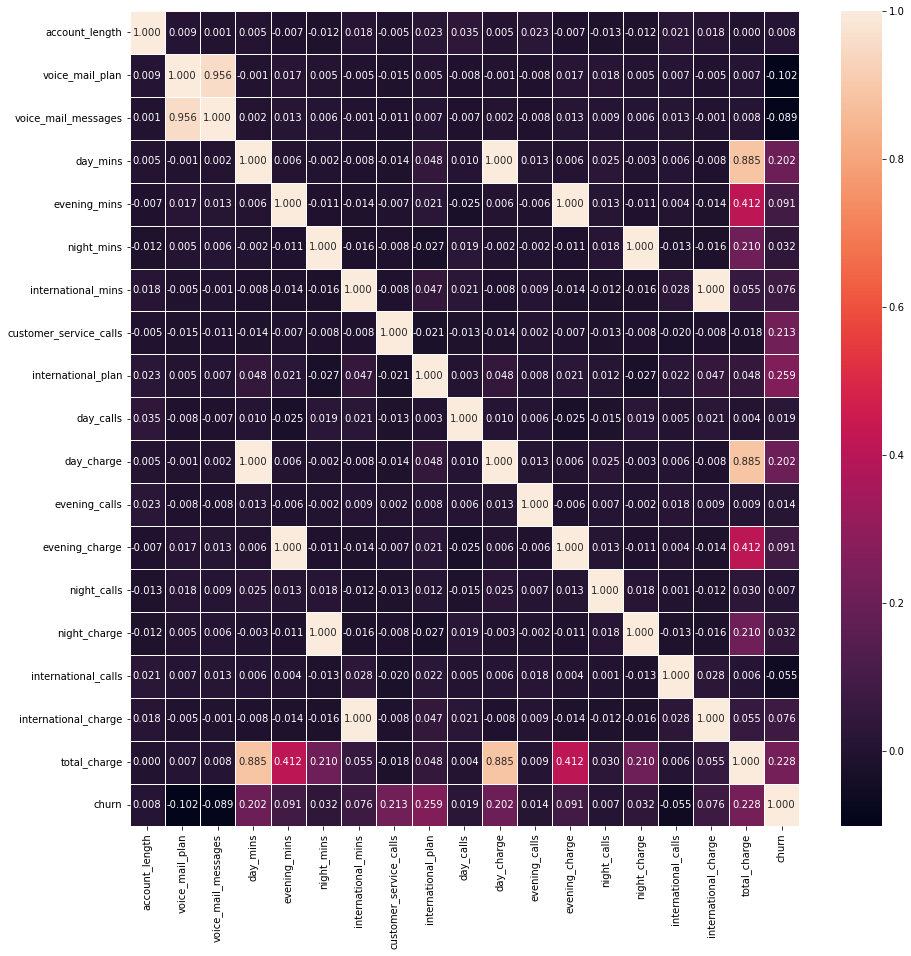

In [160]:
# creating a heatmap of correlation of the data.
corr = df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

* Accunt length
* Total Charge

# Saving new dataset

In [161]:
# df.to_csv(r'D:/p-133/churn_1.csv', index=False)
df.to_csv(r'export_cardio.csv',index=False)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,78,0,0,193.4,116.9,243.3,9.3,2,0,99,32.88,88,9.94,109,10.95,4,2.51,56.28,0
3319,96,0,0,106.6,284.8,178.9,14.9,1,0,128,18.12,87,24.21,92,8.05,7,4.02,54.40,0
3321,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3324,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


In [162]:
df.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

# FEATURE ENGINEERING

In [3]:
# Dividing our data into input and output variables 
X = df.iloc[:,0:18]
Y = df.iloc[:,18]

In [4]:
from sklearn.feature_selection import SelectKBest
from numpy import set_printoptions
from sklearn.feature_selection import chi2


bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Scores']
featureScores

,Specs,Scores
0,account_length,10.314517
1,voice_mail_plan,24.835436
2,voice_mail_messages,612.370761
3,day_mins,2320.768616
4,evening_mins,364.970811
5,night_mins,52.895946
6,international_mins,12.220811
7,customer_service_calls,163.002332
8,international_plan,200.796625
9,day_calls,4.661086


In [5]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)


[1.031e+01 2.484e+01 6.124e+02 2.321e+03 3.650e+02 5.290e+01 1.222e+01
 1.630e+02 2.008e+02 4.661e+00 3.945e+02 8.857e-01 3.102e+01 5.202e-01
 2.381e+00 1.213e+01 3.301e+00 3.320e+02]


In [6]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit (X,Y)
print (model.feature_importances_)
ExtraTreesClassifier()

[0.031 0.026 0.021 0.097 0.043 0.031 0.042 0.13  0.075 0.031 0.095 0.031
 0.044 0.031 0.033 0.048 0.042 0.149]


ExtraTreesClassifier()

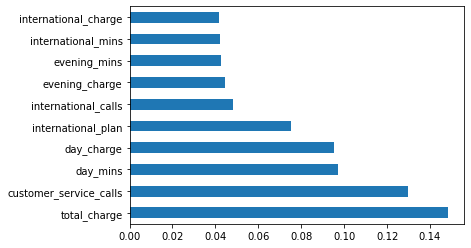

In [7]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind="barh")
plt. show()

# SMOT

In [8]:
from imblearn.over_sampling import SMOTE
smot = SMOTE(sampling_strategy='minority')
X_smot, y_smot = smot.fit_resample(X, Y)

In [9]:
X_smot

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge
0,128,1,25,265.100000,197.400000,244.700000,10.000000,1,0,110,45.070000,99,16.780000,91,11.010000,3,2.700000,75.560000
1,107,1,26,161.600000,195.500000,254.400000,13.700000,1,0,123,27.470000,103,16.620000,103,11.450000,3,3.700000,59.240000
2,137,0,0,243.400000,121.200000,162.600000,12.200000,0,0,114,41.380000,110,10.300000,104,7.320000,5,3.290000,62.290000
3,84,0,0,299.400000,61.900000,196.900000,6.600000,2,1,71,50.900000,88,5.260000,89,8.860000,7,1.780000,66.800000
4,75,0,0,166.700000,148.300000,186.900000,10.100000,3,1,113,28.340000,122,12.610000,121,8.410000,3,2.730000,52.090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,111,0,0,284.719464,157.272136,239.723685,9.050759,0,0,92,48.404427,111,13.372481,90,10.791566,7,2.445113,75.013587
5686,67,0,0,286.958490,222.462590,165.228999,8.649974,1,0,112,48.786277,49,18.908758,106,7.435409,3,2.337910,77.468353
5687,87,0,0,265.482390,218.164779,260.360377,9.233333,3,0,107,45.130566,63,18.546667,87,11.714717,3,2.492390,77.884339
5688,117,1,31,172.318784,239.488396,175.150720,13.112818,1,0,97,29.291193,100,20.357900,109,7.884298,3,3.543525,61.076917


In [10]:
y_smot

0       0
1       0
2       0
3       0
4       0
       ..
5685    1
5686    1
5687    1
5688    1
5689    1
Name: churn, Length: 5690, dtype: int64

In [11]:
df_smot = pd.concat([X_smot, y_smot], axis=1)

In [12]:
df_smot

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.100000,197.400000,244.700000,10.000000,1,0,110,45.070000,99,16.780000,91,11.010000,3,2.700000,75.560000,0
1,107,1,26,161.600000,195.500000,254.400000,13.700000,1,0,123,27.470000,103,16.620000,103,11.450000,3,3.700000,59.240000,0
2,137,0,0,243.400000,121.200000,162.600000,12.200000,0,0,114,41.380000,110,10.300000,104,7.320000,5,3.290000,62.290000,0
3,84,0,0,299.400000,61.900000,196.900000,6.600000,2,1,71,50.900000,88,5.260000,89,8.860000,7,1.780000,66.800000,0
4,75,0,0,166.700000,148.300000,186.900000,10.100000,3,1,113,28.340000,122,12.610000,121,8.410000,3,2.730000,52.090000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,111,0,0,284.719464,157.272136,239.723685,9.050759,0,0,92,48.404427,111,13.372481,90,10.791566,7,2.445113,75.013587,1
5686,67,0,0,286.958490,222.462590,165.228999,8.649974,1,0,112,48.786277,49,18.908758,106,7.435409,3,2.337910,77.468353,1
5687,87,0,0,265.482390,218.164779,260.360377,9.233333,3,0,107,45.130566,63,18.546667,87,11.714717,3,2.492390,77.884339,1
5688,117,1,31,172.318784,239.488396,175.150720,13.112818,1,0,97,29.291193,100,20.357900,109,7.884298,3,3.543525,61.076917,1


# Standardization

In [13]:
from sklearn.preprocessing import scale
df_2=scale(df_smot.iloc[:,0:18])

In [174]:
# from sklearn.preprocessing import Normalizer
# scale = Normalizer()
# df2 = scale.fit_transform(df_2)

In [14]:
df_2

array([[ 0.72 ,  2.05 ,  1.489, ..., -0.525, -0.173,  1.129],
       [ 0.159,  2.05 ,  1.57 , ..., -0.525,  1.258, -0.211],
       [ 0.96 , -0.488, -0.534, ...,  0.33 ,  0.671,  0.04 ],
       ...,
       [-0.376, -0.488, -0.534, ..., -0.525, -0.47 ,  1.32 ],
       [ 0.426,  2.05 ,  1.975, ..., -0.525,  1.034, -0.06 ],
       [ 0.479, -0.488,  0.356, ..., -0.097, -0.594, -0.926]])

In [59]:
df = pd.DataFrame(df_2, columns =['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins', 'evening_mins', 'night_mins', 'international_mins', 'customer_service_calls', 'international_plan', 'day_calls', 'day_charge', 'evening_calls', 'evening_charge', 'night_calls', 'night_charge', 'international_calls', 'international_charge', 'total_charge'])
df.drop(["voice_mail_plan","voice_mail_messages","night_mins","international_mins"], axis = 1, inplace = True)
df

,account_length,day_mins,evening_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge
0,0.719902,1.223930,-0.169880,-0.485664,-0.324143,0.480751,1.224172,-0.057605,-0.169684,-0.477868,0.876941,-0.525235,-0.173249,1.129369
1,0.158623,-0.469466,-0.207467,-0.485664,-0.324143,1.155434,-0.469703,0.155615,-0.206923,0.169401,1.081699,-0.525235,1.258102,-0.210706
2,0.960450,0.868889,-1.677311,-1.178253,-0.324143,0.688346,0.869036,0.528751,-1.677839,0.223340,-0.840234,0.330481,0.671248,0.039737
3,-0.456111,1.785123,-2.850416,0.206925,3.085054,-1.543297,1.785268,-0.643962,-2.850849,-0.585746,-0.123581,1.186197,-1.490092,0.410064
4,-0.696659,-0.386023,-1.141204,0.899513,3.085054,0.636448,-0.385972,1.168413,-1.140210,1.140304,-0.332993,-0.525235,-0.130309,-0.797810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,0.265533,1.544930,-0.963712,-1.178253,-0.324143,-0.453425,1.545087,0.582056,-0.962750,-0.531807,0.775291,1.186197,-0.538081,1.084502
5686,-0.910480,1.581563,0.325922,-0.485664,-0.324143,0.584549,1.581837,-2.722862,0.325763,0.331218,-0.786527,-0.525235,-0.691527,1.286069
5687,-0.375929,1.230186,0.240900,0.899513,-0.324143,0.325055,1.230001,-1.976590,0.241490,-0.693624,1.204888,-0.525235,-0.470412,1.320226
5688,0.425898,-0.294092,0.662736,-0.485664,-0.324143,-0.193931,-0.294426,-0.004300,0.663036,0.493035,-0.577633,-0.525235,1.034131,-0.059872


In [177]:
df.to_csv('standardize.csv', index=False)

In [60]:
final = pd.concat([df, y_smot], axis=1)
final


,account_length,day_mins,evening_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,0.719902,1.223930,-0.169880,-0.485664,-0.324143,0.480751,1.224172,-0.057605,-0.169684,-0.477868,0.876941,-0.525235,-0.173249,1.129369,0
1,0.158623,-0.469466,-0.207467,-0.485664,-0.324143,1.155434,-0.469703,0.155615,-0.206923,0.169401,1.081699,-0.525235,1.258102,-0.210706,0
2,0.960450,0.868889,-1.677311,-1.178253,-0.324143,0.688346,0.869036,0.528751,-1.677839,0.223340,-0.840234,0.330481,0.671248,0.039737,0
3,-0.456111,1.785123,-2.850416,0.206925,3.085054,-1.543297,1.785268,-0.643962,-2.850849,-0.585746,-0.123581,1.186197,-1.490092,0.410064,0
4,-0.696659,-0.386023,-1.141204,0.899513,3.085054,0.636448,-0.385972,1.168413,-1.140210,1.140304,-0.332993,-0.525235,-0.130309,-0.797810,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,0.265533,1.544930,-0.963712,-1.178253,-0.324143,-0.453425,1.545087,0.582056,-0.962750,-0.531807,0.775291,1.186197,-0.538081,1.084502,1
5686,-0.910480,1.581563,0.325922,-0.485664,-0.324143,0.584549,1.581837,-2.722862,0.325763,0.331218,-0.786527,-0.525235,-0.691527,1.286069,1
5687,-0.375929,1.230186,0.240900,0.899513,-0.324143,0.325055,1.230001,-1.976590,0.241490,-0.693624,1.204888,-0.525235,-0.470412,1.320226,1
5688,0.425898,-0.294092,0.662736,-0.485664,-0.324143,-0.193931,-0.294426,-0.004300,0.663036,0.493035,-0.577633,-0.525235,1.034131,-0.059872,1


In [ ]:
final.to_csv('final.csv', index=False)

In [18]:
from sklearn.model_selection import LeavePOut,cross_val_score
from sklearn.ensemble import RandomForestClassifier
X=final.iloc[:,0:18]
Y=final.iloc[:,18]
lpo=LeavePOut(p=100)
lpo.get_n_splits(X)
tree=RandomForestClassifier(n_estimators=1,max_depth=3,n_jobs=-1)
score=cross_val_score(tree,X,Y,cv=lpo)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

KeyboardInterrupt: 

# CROSS VALIDATION 

In [21]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
X=final.iloc[:,0:18]
Y=final.iloc[:,18]
logreg=LogisticRegression()
stratifiedkf=StratifiedKFold(n_splits=500)
score=cross_val_score(logreg,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.583 0.667 0.417 0.667 0.917 0.583 0.833 0.667 0.667 0.75  0.583 0.5
 0.917 0.75  0.75  0.667 0.833 0.75  0.583 0.667 0.5   0.917 0.583 0.833
 0.667 0.417 0.5   0.667 0.75  0.667 0.5   0.75  0.667 0.583 0.917 0.75
 0.583 0.833 0.75  0.5   0.5   0.667 0.833 0.75  0.583 0.833 0.833 0.917
 0.75  0.75  0.75  0.917 0.667 0.583 0.667 0.75  0.5   0.917 0.667 0.75
 0.583 0.75  0.667 0.833 0.583 0.833 0.833 0.833 0.75  0.667 0.75  0.75
 0.833 0.917 0.75  0.917 0.583 0.917 0.75  0.833 0.833 0.583 0.75  0.833
 0.75  0.75  0.917 0.5   0.667 0.583 0.75  0.833 0.917 0.833 0.667 0.833
 0.833 0.917 0.75  0.583 0.917 0.667 0.583 0.75  0.583 0.583 0.917 0.917
 0.667 0.75  0.75  0.75  0.75  0.667 0.5   0.75  0.5   0.667 0.833 0.917
 0.667 0.833 0.75  0.583 0.833 0.667 0.667 0.583 0.583 0.833 1.    0.75
 0.917 0.583 0.917 0.583 0.917 0.667 0.833 0.833 0.75  0.417 0.833 0.667
 0.833 0.667 0.75  0.75  0.75  0.833 0.667 0.667 0.75  1.    0.917 0.667
 0.917 0.333 0.583 0.833 0.66

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut,cross_val_score
X=final.iloc[:,0:18]
Y=final.iloc[:,18]
loo=LeaveOneOut()
tree=RandomForestClassifier(n_estimators=10,max_depth=5,n_jobs=-1)
score=cross_val_score(tree,X,Y,cv=loo)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1. 1. 1. ... 1. 0. 1.]
Average Cross Validation score :0.8402460456942004


In [23]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=10)
scores=cross_val_score(logreg,final.iloc[:,0:18],final.iloc[:,18],cv=shuffle_split)
print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

cross Validation scores:n [0.722 0.739 0.752 0.728 0.742 0.752 0.732 0.727 0.732 0.741]
Average Cross Validation score :0.7364967779730522


In [62]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
X = final.iloc[:,0:14]
Y = final.iloc[:,14]
logreg=LogisticRegression()
kf=KFold(n_splits=300)
score=cross_val_score(logreg,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.474 0.789 0.632 0.526 0.526 0.632 0.579 0.579 0.684 0.526 0.737 0.789
 0.684 0.421 0.368 0.789 0.842 0.684 0.737 0.737 0.632 0.684 0.421 0.632
 0.737 0.737 0.789 0.737 0.789 0.737 0.579 0.789 0.474 0.737 0.632 0.684
 0.737 0.684 0.737 0.842 0.684 0.526 0.737 0.895 0.684 0.684 0.684 0.842
 0.947 0.737 0.684 0.789 0.789 0.737 0.684 0.895 0.684 0.737 0.474 0.842
 0.895 0.632 0.737 0.632 0.684 0.579 0.632 0.789 0.579 0.526 0.632 0.684
 0.737 0.684 0.842 0.526 0.684 0.789 0.632 0.684 0.684 0.737 0.789 0.737
 0.737 0.737 0.789 0.632 0.789 0.474 0.842 0.632 0.684 0.737 0.684 0.579
 0.684 0.737 0.579 0.632 0.632 0.789 0.684 0.684 0.842 0.474 0.579 0.684
 0.895 0.684 0.842 0.842 0.684 0.632 0.789 0.684 0.684 0.579 0.632 0.789
 0.842 0.474 0.789 0.737 0.579 0.684 0.895 0.789 0.684 0.737 0.737 0.789
 0.789 0.789 0.684 0.737 0.526 0.737 0.632 0.632 0.789 0.579 0.789 0.737
 0.684 0.842 0.789 0.684 0.632 0.737 0.632 0.895 0.632 0.526 0.684 0.895
 0.737 0.579 0.842 0.78

# XGBOOST

In [63]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [69]:
from xgboost import XGBClassifier

params = {
            'objective':'binary:logistic',
            'max_depth': 5,
            'alpha': 10,
            'gamma': 0.0,
            'learning_rate': 0.9,
            'n_estimators':100
        }     
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

c:\Users\Shree\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:43:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.9, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
print(xgb_clf)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.9, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [71]:
y_pred = xgb_clf.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8834


In [73]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [74]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.853385,0.005878,0.845871,0.002415
1,0.873084,0.002297,0.860997,0.007919
2,0.879720,0.007689,0.864078,0.011223
3,0.882656,0.001415,0.866431,0.005443
4,0.881695,0.006538,0.863146,0.009830


# Feature Importance Using XGBOOST

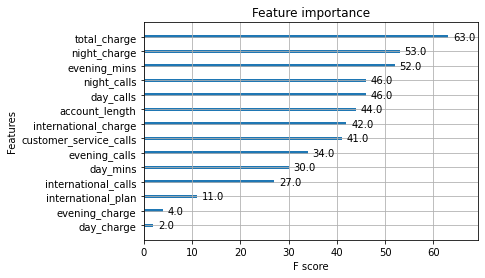

<Figure size 1152x864 with 0 Axes>

In [75]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = final.iloc[:,0:15]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                   feature           VIF
0           account_length  1.009930e+00
1                 day_mins  1.534164e+07
2             evening_mins  2.597612e+06
3   customer_service_calls  1.124272e+00
4       international_plan  1.031226e+00
5                day_calls  1.007113e+00
6               day_charge           inf
7            evening_calls  1.004738e+00
8           evening_charge           inf
9              night_calls  1.008183e+00
10            night_charge           inf
11     international_calls  1.019353e+00
12    international_charge           inf
13            total_charge           inf
14                   churn  1.099982e+00


c:\Users\Shree\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
